# **Loan Default Prediction**

## **Problem Definition**
The bank's consumer credit department would like to establish a simplified decision making model to predict clients who will default on a home equity loan (HEQ) that is both reliable and rigorous. The bank would like to us to use the following to generate the predictive model:
- Decisions will be made based on the features found in the guidelines of the Equal Credit Opportunity Act(HMEQ). 
- The data provided will be from the *existing* loan underwriting process and include *only* clients who have been given home equity lines of credit by the bank. 

### **The Context:**
A home equity loan (HEQ) is a fixed-amount loan taken out against the equity in a client's home. The loan can be given all at once and then paided off overtime with a fixed-interest rate and fixed monthly payments. The equity a client has in their home is calculated by taking the amount left in the mortgage and subtracting it from the value of the home. Therefore, a client can only request a HEQ that is $\leq$ the equity. 

*Interest on HEQ's are a major* portion of the bank's profit, and if a client default on their loan the bank *cannot* turn a profit on that loan. Therefore, determining whether or not a client is going to default on their loan is a critical to business operation. The current manual process is both effort-intesive and prone to human error and biases that lead to loans being given to perspective clients who are likely to default. 

Previous attempts to automate this process were based on heuristics but were still prone to the same issues of the manual process. Thus, the bank's consumer credit department decided it would be best to use data science and machine learning to automate the process so that the biases and errors found in the human-based approval process, and therefore the likelihood of giving out a loan to a client who will default, would be reduced. 

### **The objective:**
Our goal is two-fold:
1. To build a classification model that can predict perspective HEQ clients who are likely to default on their loan. 
2. To provide the bank with recommendations on which features of the HMEQ are most important to consider when seeking to approve a loan.

### **The key questions:**
1. What are the key features of a perspective client that would lead them to default?
2. How do each of the key features play into a clients default likelihood?
3. How do these key features work together to predict a client who will default?


### **The problem formulation**:
Our aim is to analyze the data given to us by the Consumer Credit Department and use our analysis as a guide to build a model that will predict whether or not a client will default based on the HMEQ guidelines. 

To do this we will:
1. Understand the structure and components of the data.
2. Explore the data using univariate, bivariate and multivariate analysis techniques.
3. Utilize steps 1 and 2 to build, and tune 3 different classification models.
    - Logistic Regression
    - Decision Tree
    - Random Forest
4. Select the model that *not only* best fits the data but also aligns closely with the desires of the Consumer Credit Department. 

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-Income ratio is the *total number of monthly debt payments* divided by a clients gross income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow. The higher the DTI the *less* likely a client may be able to manage the monthly payments.<br> <br> $\dfrac{Total\,Monthly\,Debt\,Payments}{Gross\,Income}$
   

## **Import the necessary libraries and Data**

In [403]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# disable pop_up display of graphs to display them in notebook.
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Classification Trees
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics

from sklearn.metrics import (
    confusion_matrix, 
    classification_report, 
    recall_score, 
    precision_score, 
    accuracy_score,
    precision_recall_curve
)

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values
- What is the background of this data? What does it contain? 
- Write the observation from the Data Description such as  shape of data, data types of various attributes, missing values,statistical summary. 
- Write some initial observations on range of attributes, outliers of various attributes.

In [404]:
# read in data and save into variable
data = pd.read_csv('hmeq.csv')

In [405]:
# view the first 5 records and the feature columns of the dataset
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [406]:
# view general info about feature structure and data types 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Observations**
- There are a total of 5960 records and 13 features
- Our target variable, 'BAD' is of data type `int64`
- There are 2 features that are of data type object, while the rest are numerical data types.
- There does not appear to be a unique ID feature column in this dataset, so we may not be able to identify specific clients. 

## **Exploratory Data Analysis (EDA) and Visualization**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.
- What are some key patterns in the data? 
- What does it mean for the problem formulation?


### Number of Unique Values by Feature

In [407]:
# view the number of unique records per feature
data.nunique()

BAD           2
LOAN        540
MORTDUE    5053
VALUE      5381
REASON        2
JOB           6
YOJ          99
DEROG        11
DELINQ       14
CLAGE      5314
NINQ         16
CLNO         62
DEBTINC    4693
dtype: int64

### Duplicate Feature Check

In [408]:
# check for duplicate values
data.duplicated().sum()

np.int64(0)

**Observations**
- There doesn't appear to be any columns that have the same amount of unique values as the length of our dataset.
- Our target variable, 'BAD', has only two unique values which will be very helpful in our future classification models. 
- 'REASON' has two unique values and is of datatype 'object'
- There appears to be no duplicate records in the dataset.

### Missing Value Check


In [409]:
data.isna().sum().sort_values(ascending=False)

DEBTINC    1267
DEROG       708
DELINQ      580
MORTDUE     518
YOJ         515
NINQ        510
CLAGE       308
JOB         279
REASON      252
CLNO        222
VALUE       112
BAD           0
LOAN          0
dtype: int64

In [410]:
# get percentage of total values are missing values for each feature.
(((data.isna().sum())/data.shape[0]) * 100).sort_values(axis=0, ascending=True)

BAD         0.000000
LOAN        0.000000
VALUE       1.879195
CLNO        3.724832
REASON      4.228188
JOB         4.681208
CLAGE       5.167785
NINQ        8.557047
YOJ         8.640940
MORTDUE     8.691275
DELINQ      9.731544
DEROG      11.879195
DEBTINC    21.258389
dtype: float64

**Observations**<br>
- There appear to be several features with missing values that will need to be handled.
    - Fortunately, the target variable, **BAD** is not amoung them. 
- **DEBTINC** (debt_to_income) has the highest proportion of missing values at ~21.26%


### Separate Continuous and Categorical type features

In [411]:
# creating a deep copy of the original data so we don't manipulate the original dataset
df = data.copy()

In [412]:
# update names in copied DataFrame to be more easily understandable. #TODO
df.columns = df.columns.str.lower()

df = df.rename(columns={'bad': 'defaulted', 'mortdue': 'mortgage_due', 'value': 'property_value', 'yoj': 'years_at_job', 'derog': 'derogatory_reports', 'delinq': 'delinquent_lines', 'clage': 'credit_line_age', 'ninq': 'credit_inquiries', 'clno': 'credit_lines', 'debtinc': 'debt_to_income', 'job': 'profession'})

df.columns

Index(['defaulted', 'loan', 'mortgage_due', 'property_value', 'reason',
       'profession', 'years_at_job', 'derogatory_reports', 'delinquent_lines',
       'credit_line_age', 'credit_inquiries', 'credit_lines',
       'debt_to_income'],
      dtype='object')

In [413]:
# separating continuous feature labels from categorical for EDA
num_cols = list(df.columns[df.dtypes != 'object'])
num_cols

['defaulted',
 'loan',
 'mortgage_due',
 'property_value',
 'years_at_job',
 'derogatory_reports',
 'delinquent_lines',
 'credit_line_age',
 'credit_inquiries',
 'credit_lines',
 'debt_to_income']

In [414]:
# separating categorical feature labels from continous for EDA
cat_cols = list(df.columns[df.dtypes == 'object'])
cat_cols

['reason', 'profession']

### Summary Statistics

In [415]:
# view statisitcs on continuous features.
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
defaulted,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
loan,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
mortgage_due,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
property_value,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
years_at_job,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
derogatory_reports,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
delinquent_lines,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
credit_line_age,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
credit_inquiries,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
credit_lines,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


**Observations**
- **loan**, **mortgage_due** and **property_value** have a indicators that this feature may have outliers because the min and max are far apart. 
    - For **mortgage_due** and **property_value** this is expected because these will vary wildly depending on the property bought and how much a client pays initially.
    - FOR **loan** this is also expected because the underlying amount behind the categorical variable **reason** is affected by how much the client needs for what they are doing. 
- **property_value** and **mortgage_due** may be dependent on each other because the mortgage is based on the value of the propery and the variance comes from how much the downpayment was. 
    - This is further supported by a similar 'distribution' in the statistical summary between the mean, standard deviation, and min and max values for the **property_value** feature.

In [416]:
# view statisitcs on categorical features
df[cat_cols].describe(exclude='number').T

,count,unique,top,freq
reason,5708,2,DebtCon,3928
profession,5681,6,Other,2388


**Observations**
- Given that there are only 6 unique values for the **job** feature and the most frequently attributed is 'Other', the affect a client's job may have on their default risk may not be fully visible. The 'Other' class makes up $\approx 42\%$.
- The 'DebtCon' class of the **reason** feature makes up $\approx 68.8\%$ of the reason a client is asking for a loan. 

### **Univariate Analysis**


#### Continuous

##### target variable

In [417]:
# view the percent/class of the target variable 'defaulted'{0: repaid, 1: defaulted}
df['defaulted'].value_counts(normalize=True)

defaulted
0    0.800503
1    0.199497
Name: proportion, dtype: float64

In [418]:
# function to plot a histogram 
def generate_1_D_histogram_boxplot(
        data:pd.DataFrame, 
        feature:str, 
        figsize:tuple[int, int] = (15, 10),
        bins:str | int = 'auto', 
        kde:bool = False):
    """ 
    Generate a 1-D Histogram and Boxplot.
    Params:
        data: pd.DataFrame, the dataset.
        feature: str, the data from the dataset to plot.
        figsize: tuple(int,int), the size of the resulting histogram. Default: (15,10).
        bins: str | int, number of bins to distribute the data into. Default: 'auto'.
        kde: bool, display the Kernel Density Estimation Curve on the histogram. Default: False. 
    Returns:
        None
    """
    f2, (ax_box, ax_hist) = plt.subplots(
        nrows=2, # num rows in subplot
        sharex=True, # share the x-axis on subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)}, # gird creation instructions
        figsize=figsize # figure size for each subplot
    )
    # create box plot
    sns.boxplot(data=data, x=feature, ax=ax_box, showmeans=True)
    # create histogram
    sns.histplot(data=data, x=feature, bins=bins, kde=kde, ax=ax_hist)

##### loan

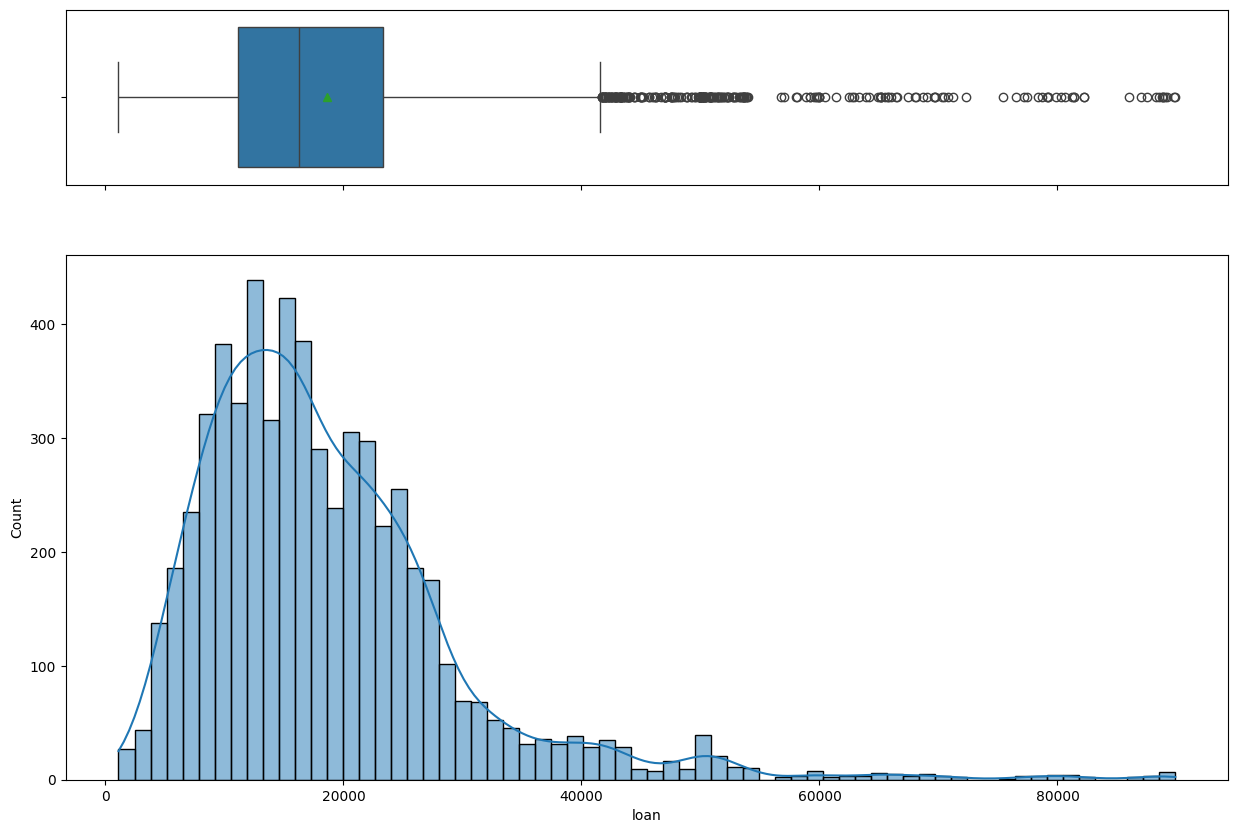

In [419]:
generate_1_D_histogram_boxplot(df, 'loan', kde=True)

##### mortgage_due

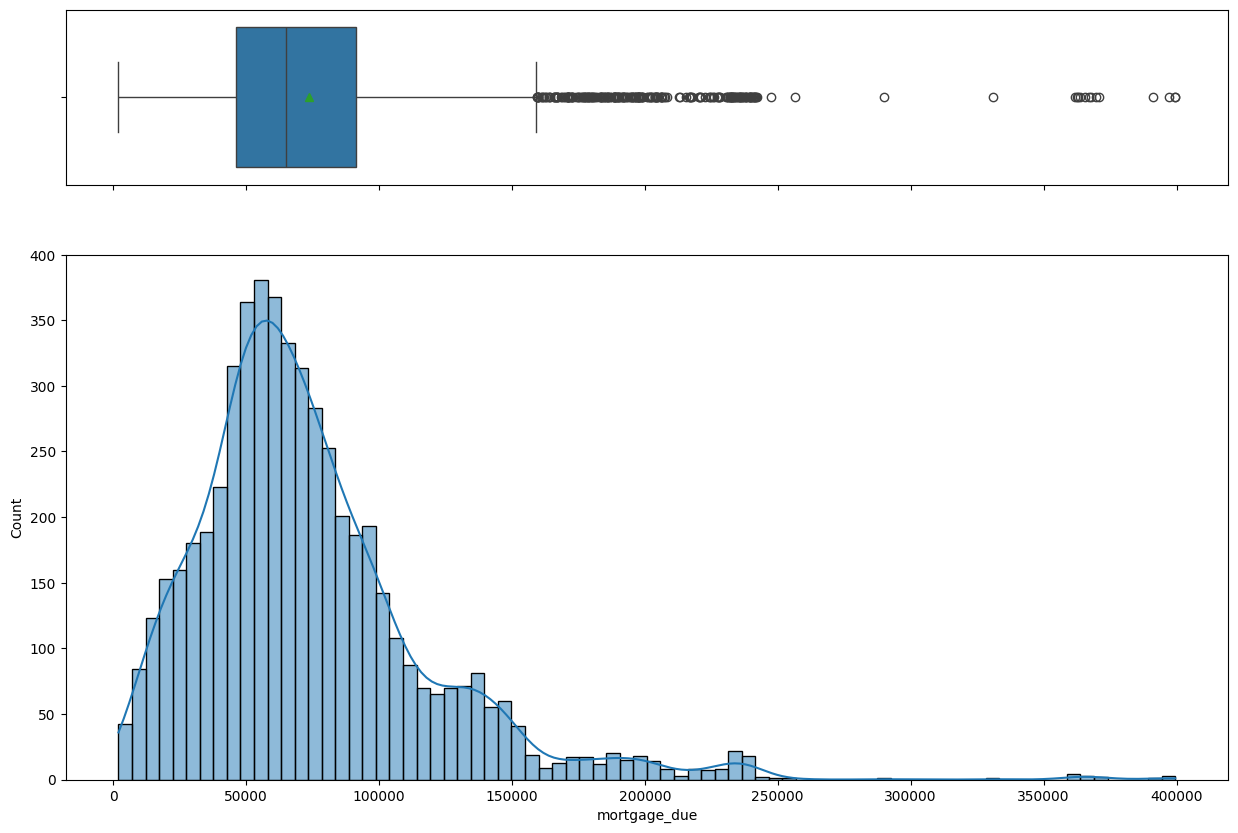

In [420]:
generate_1_D_histogram_boxplot(df, 'mortgage_due', kde=True)

##### property_value

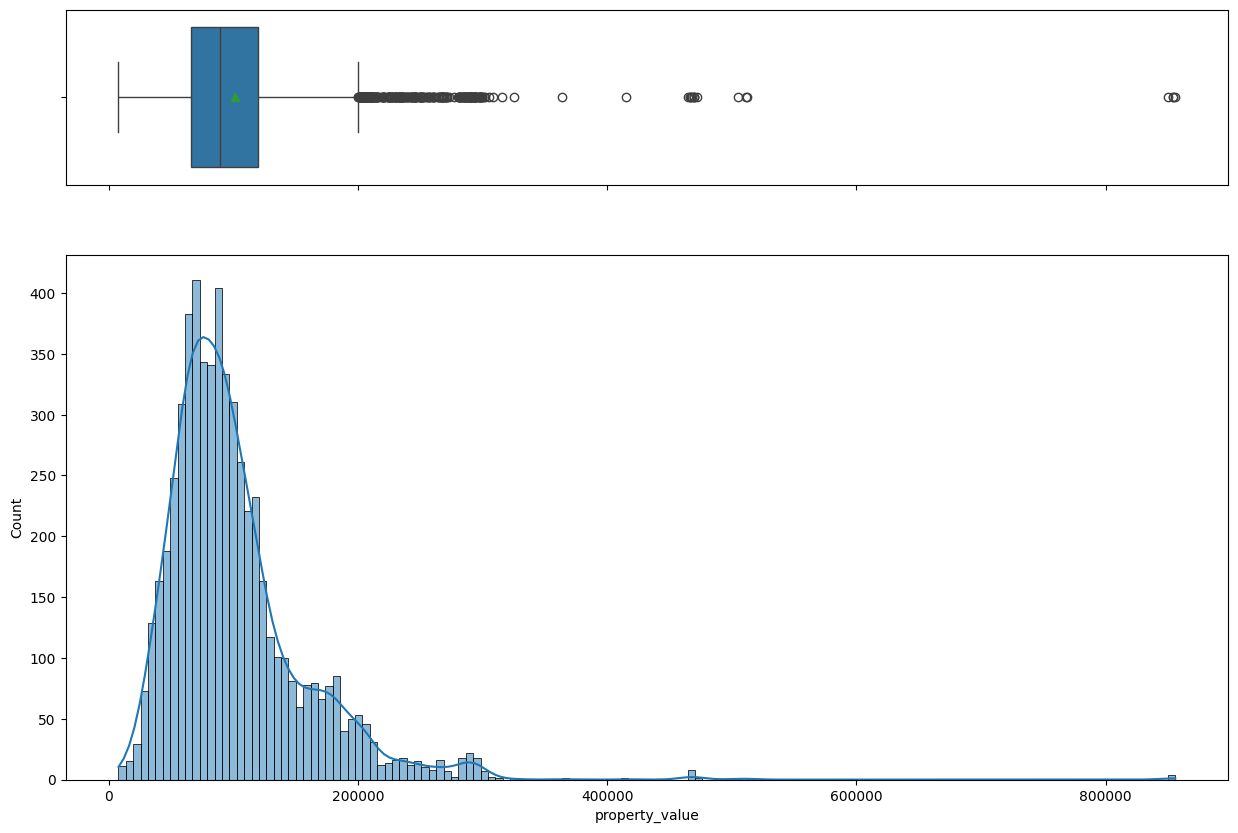

In [421]:
generate_1_D_histogram_boxplot(df, 'property_value', kde=True)

##### years_at_job

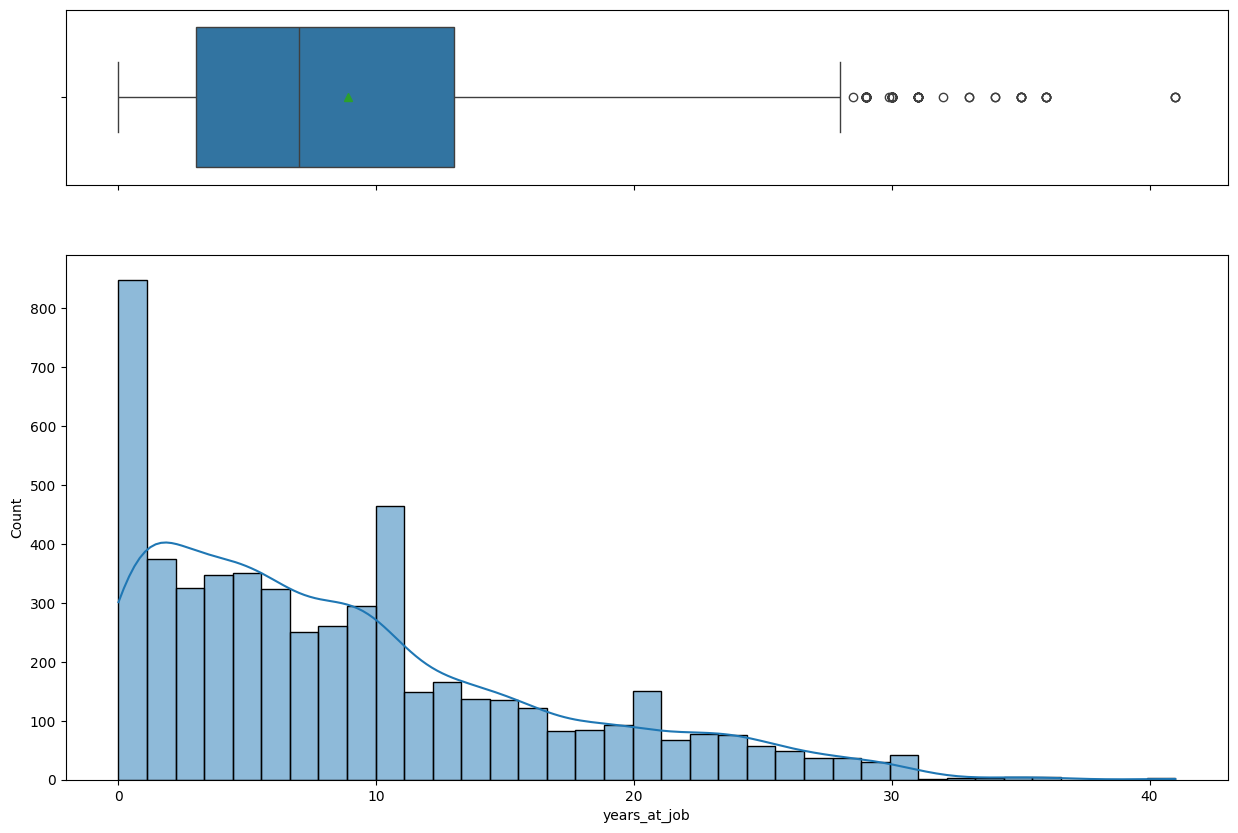

In [422]:
generate_1_D_histogram_boxplot(df, 'years_at_job', kde=True)

##### derogatory_reports

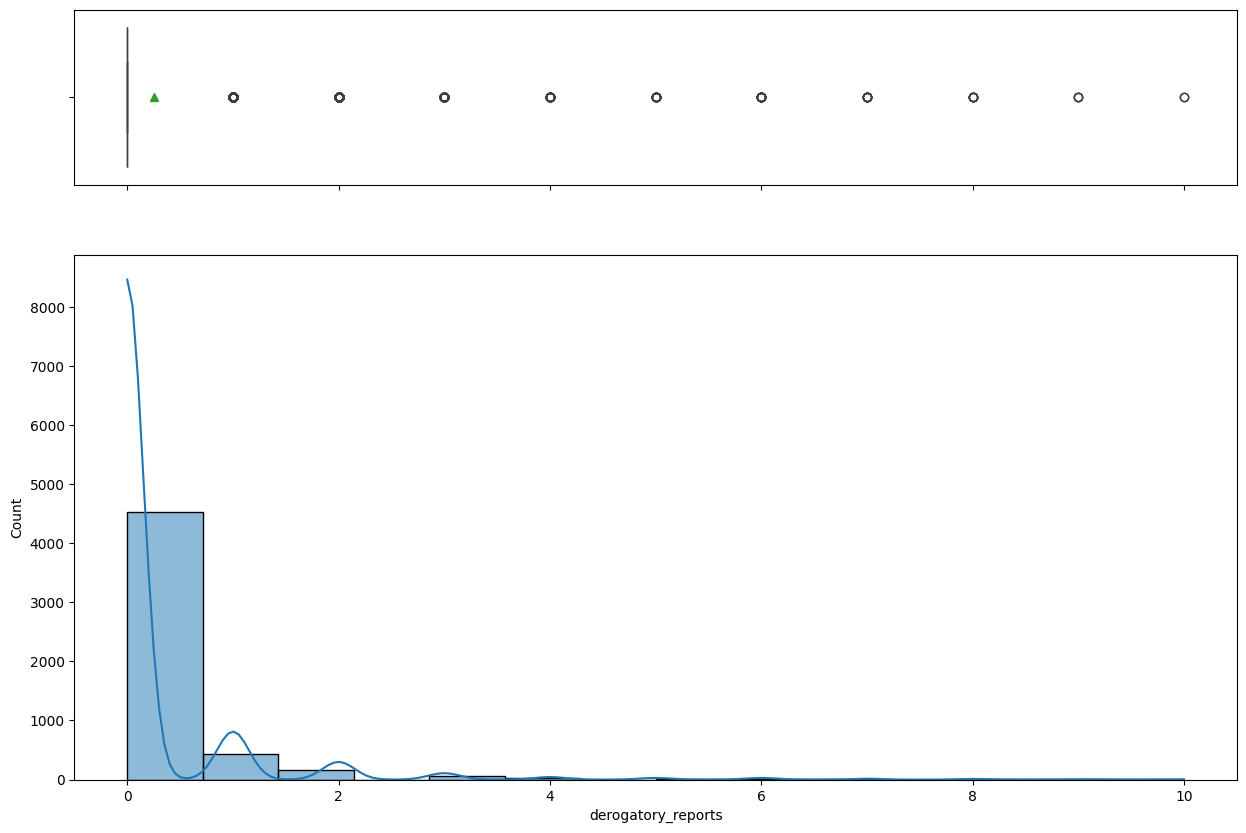

In [423]:
generate_1_D_histogram_boxplot(df, 'derogatory_reports', kde=True)

##### delinquent_lines

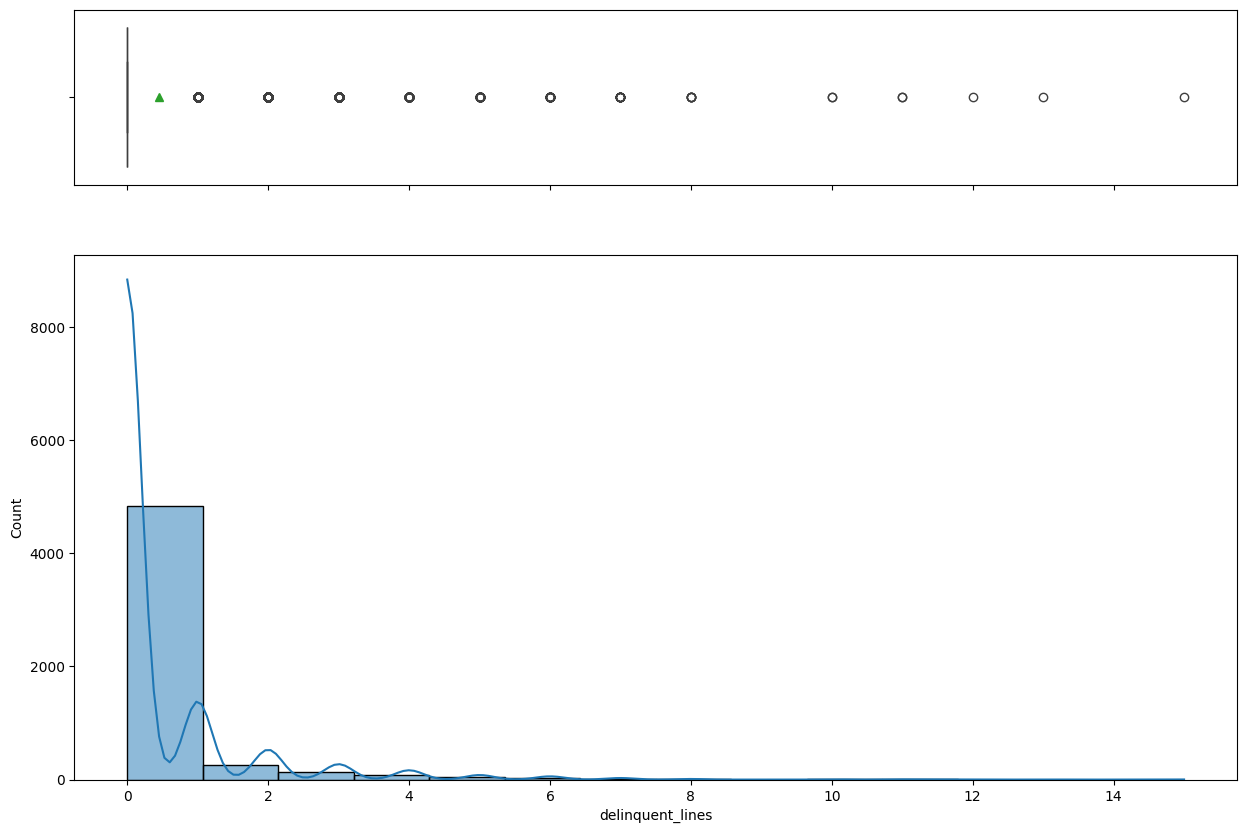

In [424]:
generate_1_D_histogram_boxplot(df, 'delinquent_lines', kde=True)

##### credit_line_age

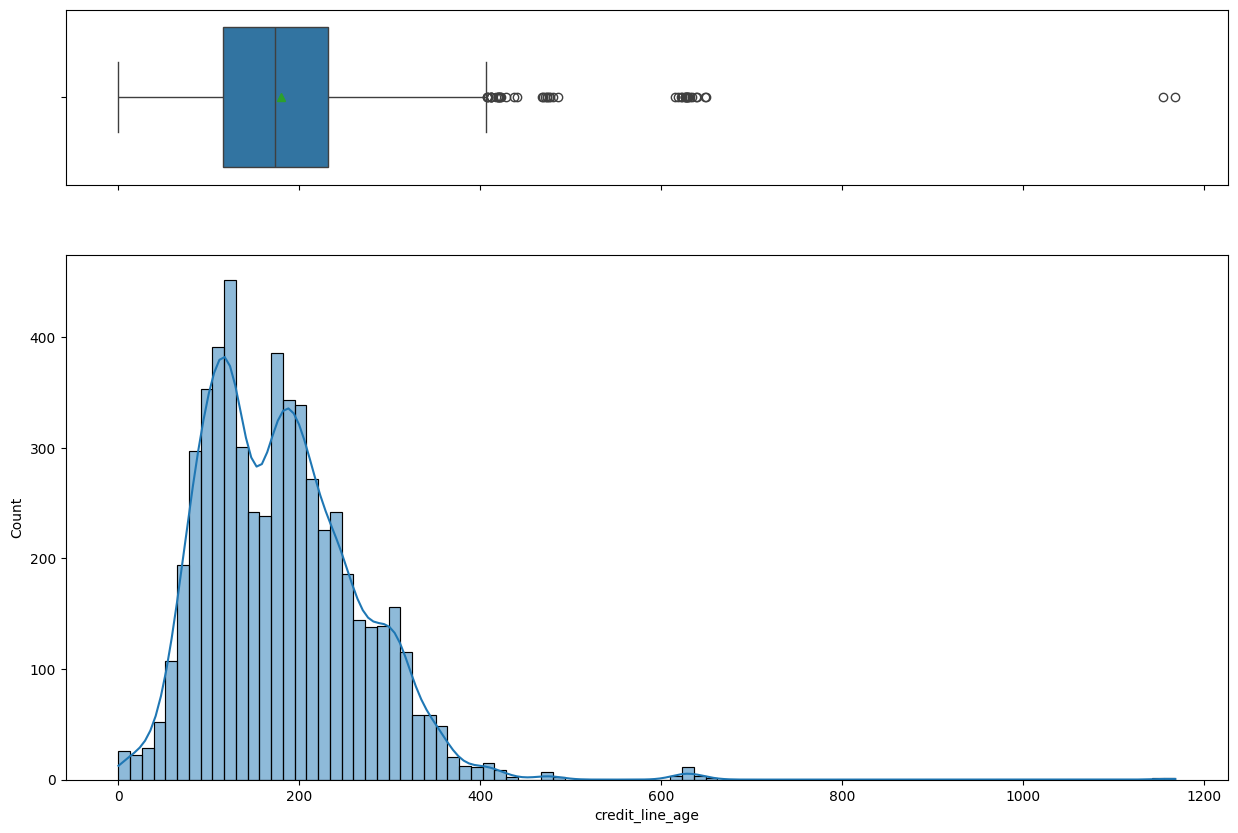

In [425]:
generate_1_D_histogram_boxplot(df, 'credit_line_age', kde=True)

##### credit_inquiries

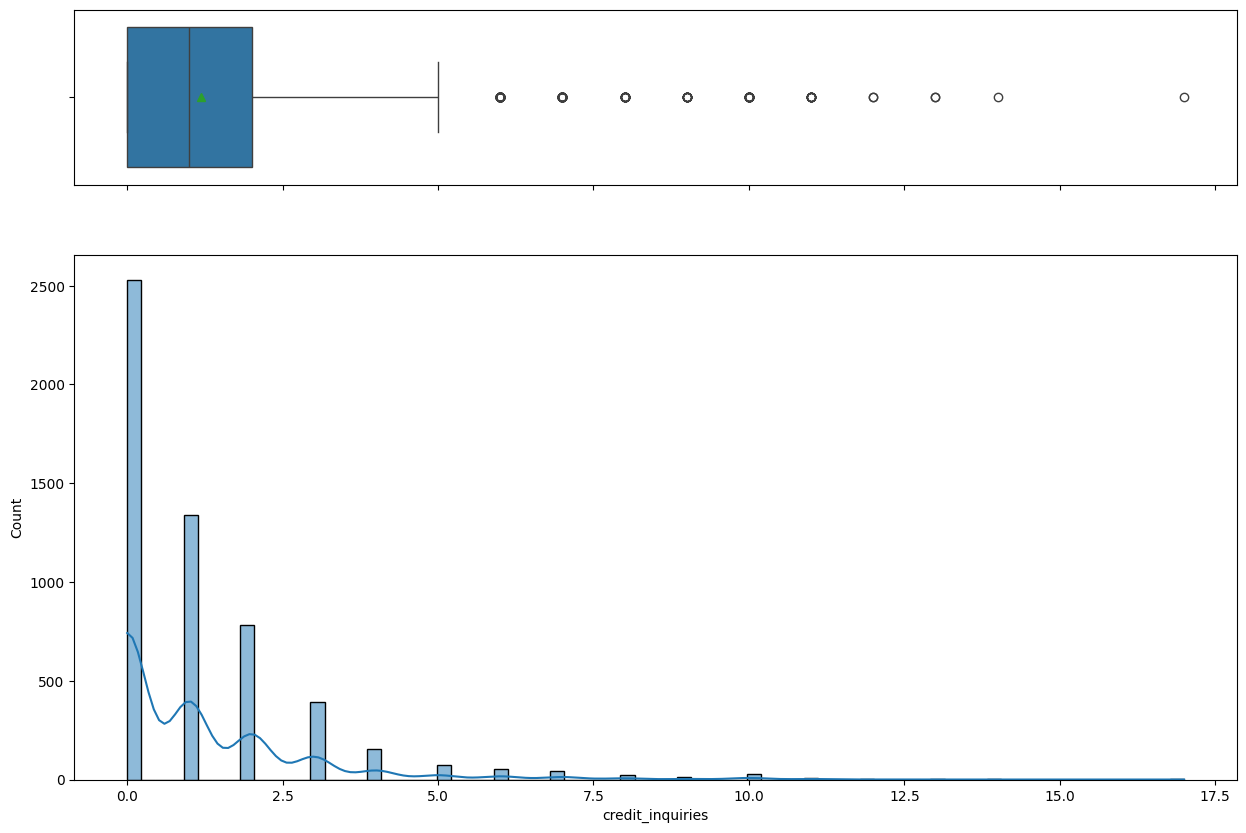

In [426]:
generate_1_D_histogram_boxplot(df, 'credit_inquiries', kde=True)

##### credit_lines

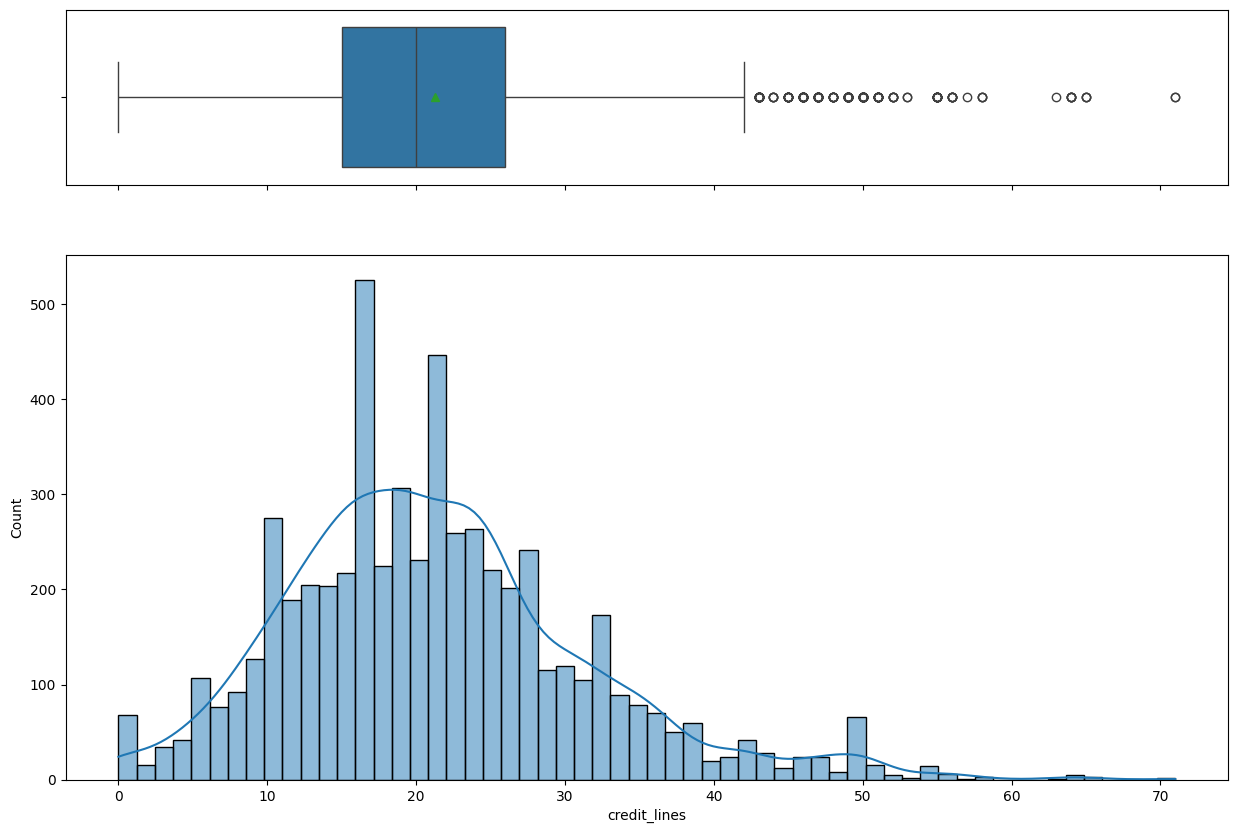

In [427]:
generate_1_D_histogram_boxplot(df, 'credit_lines', kde=True)

##### debt_to_income 

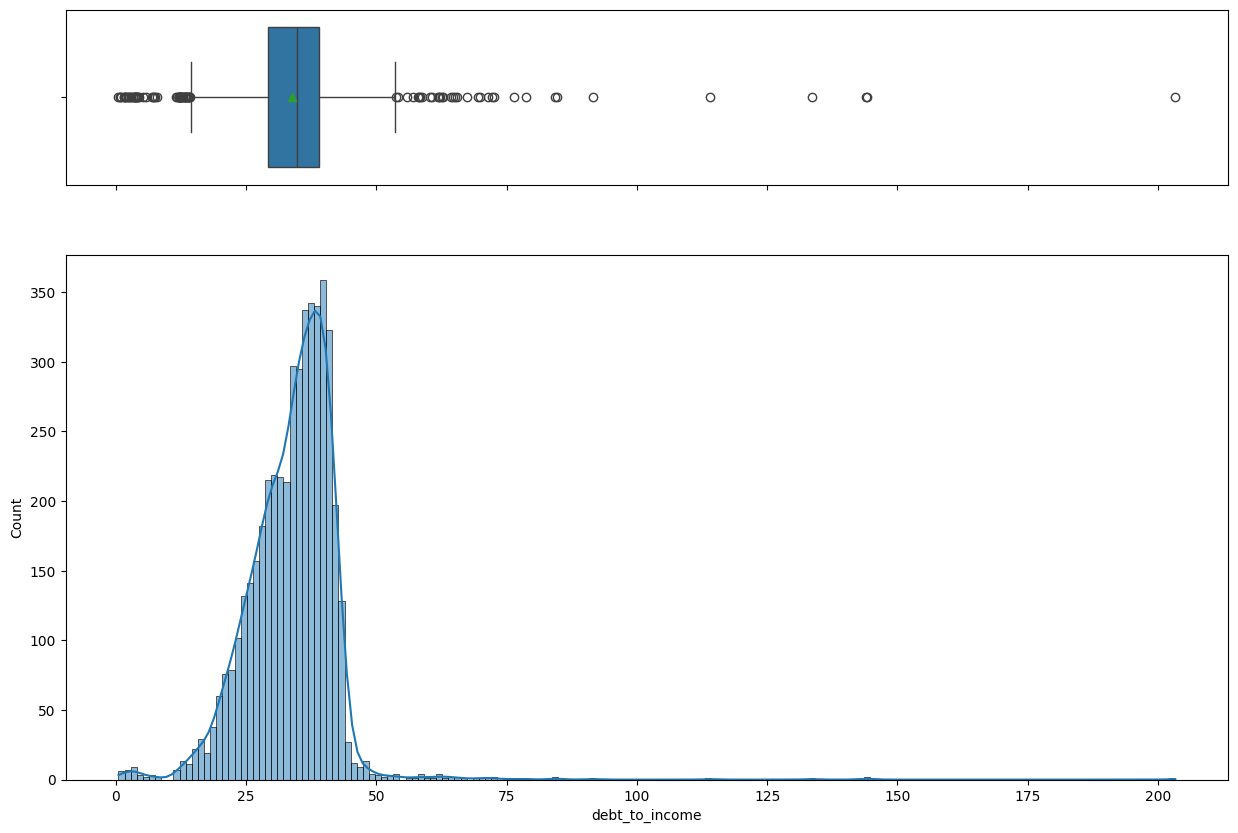

In [428]:
generate_1_D_histogram_boxplot(df, 'debt_to_income', kde=True)

#### **Observations**
- There doesn't appear to be a feature without outliers.
- The following feature does not exhibit heavy skewing:
    - **credit_lines**
- The remaining features are skewed to the right

#### Categorical

##### Percent Frequency

In [429]:
# get the percent frequency of each unique class in the categorical features
for c in cat_cols:
    print(df[c].value_counts(normalize=True))

    print('-' * 30)

reason
DebtCon    0.688157
HomeImp    0.311843
Name: proportion, dtype: float64
------------------------------
profession
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: proportion, dtype: float64
------------------------------


##### Distributions

In [430]:
def generate_bar_graph(data:pd.DataFrame, x:str, figsize:tuple[int, int]=(15,10)):
    """ 
    Generate a bar graph.
    Params:
        data: pd.DataFrame, the dataset.
        x: str, the data from the dataset to plot.
        figsize: tuple(int, int), the size of the resulting bar graph. Default=(15,10)
    Returns:
        None
    """
    plt.figure(figsize=figsize)
    plt.title(f"{x}")
    sns.countplot(data=data, x=x)

**job**

ValueError: Could not interpret value `job` for `x`. An entry with this name does not appear in `data`.

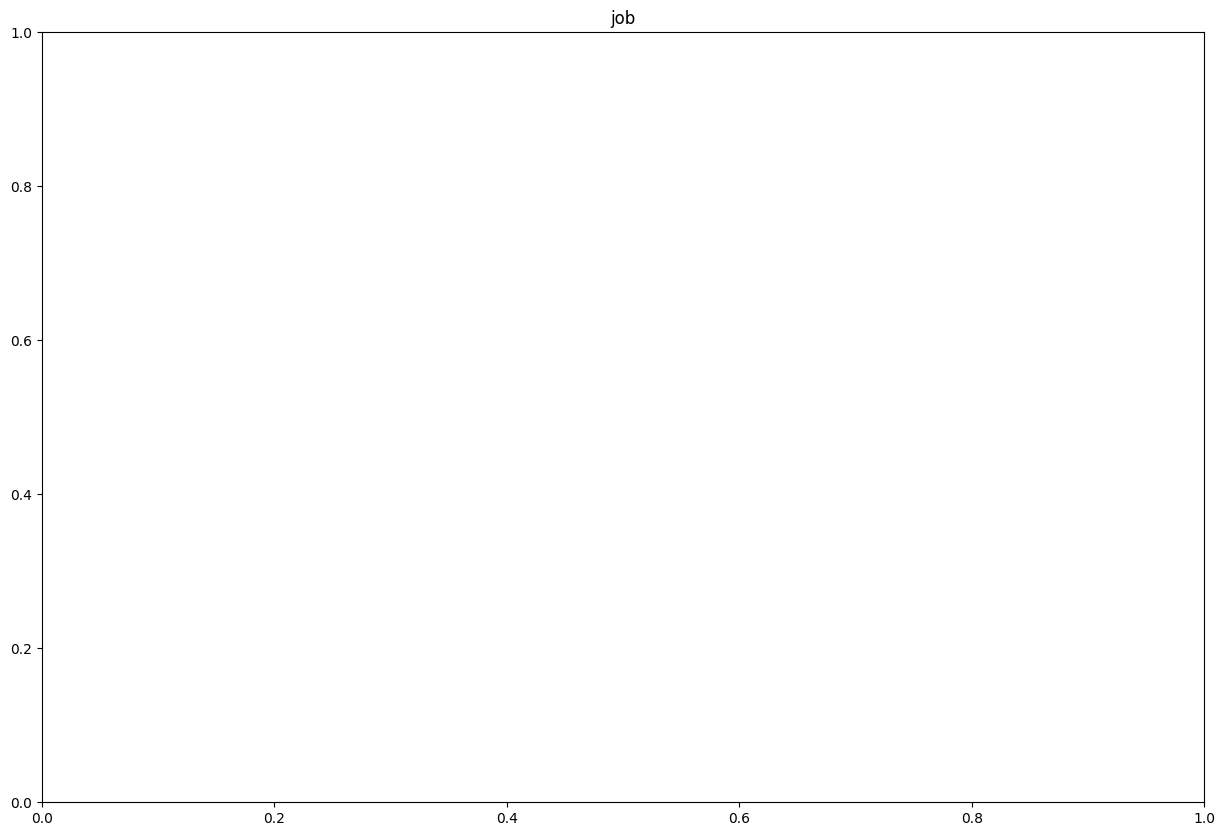

In [431]:
generate_bar_graph(df, 'job')

**reason**

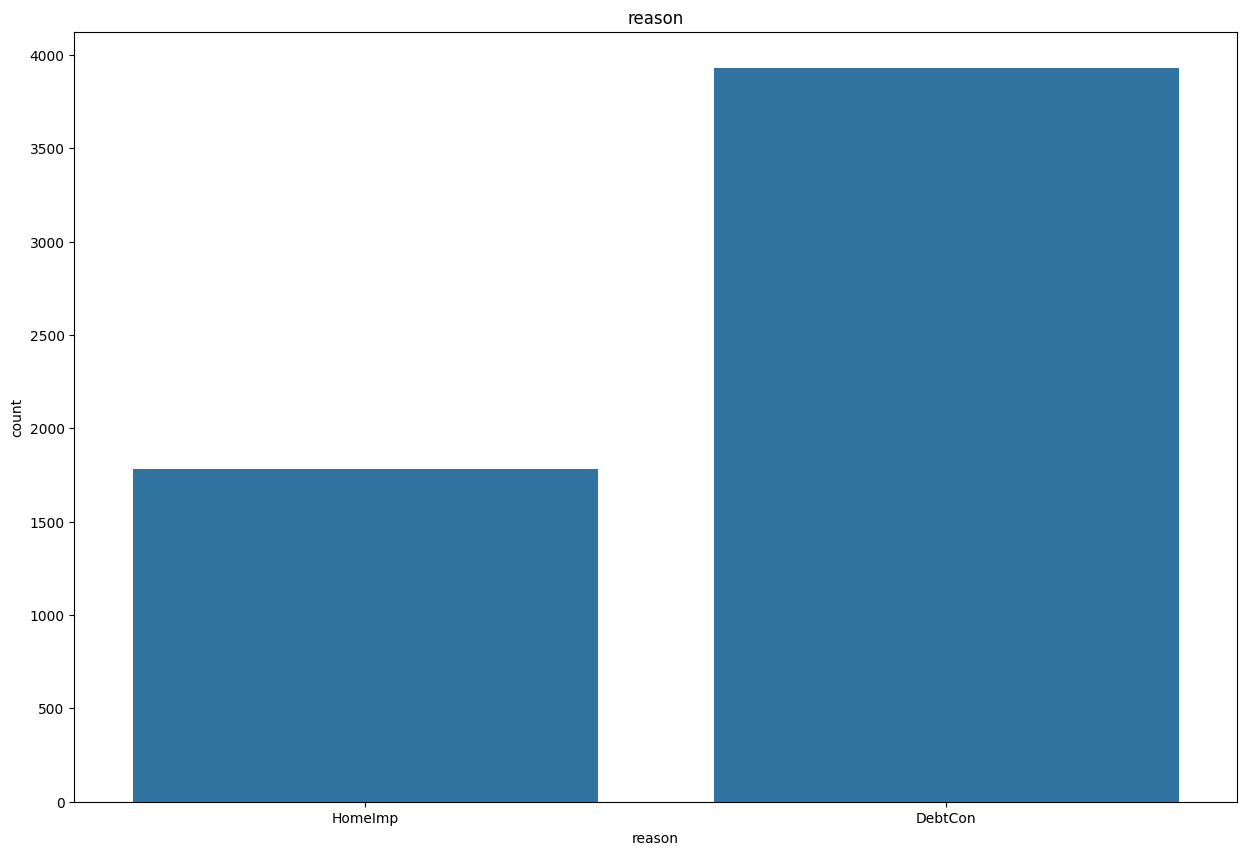

In [ ]:
generate_bar_graph(df, 'reason')

**Observations**
- As was noted earlier, in the **job** feature the *Other* class is the most frequently reported of the bank's clients. 
    - The next is *ProfExe*, followed by *Office*. 
    - It appears that the job titles that the bank tracks are all centered around 'traditional' business roles, which could explain the high prevalance of the *Other* class since jobs, by nature, are more diverse.  
- For the **reason** feature, *DebtCon* which stands for debt-consolidation is ~2/3's of the total loan requests. 

### **Bivariate Analysis**

#### Continuous

In [400]:
df.groupby(['defaulted'])[num_cols[1:]].mean().T

defaulted,0,1
loan,19028.107315,16922.119428
mortgage_due,73982.084391,69064.495013
property_value,102576.318640,97383.593616
years_at_job,8.951687,7.971615
derogatory_reports,0.116747,0.656013
delinquent_lines,0.219032,1.154752
credit_line_age,186.349827,151.717152
credit_inquiries,1.029763,1.733389
credit_lines,21.270384,21.157275
debt_to_income,33.410921,36.367010


#### Categorical

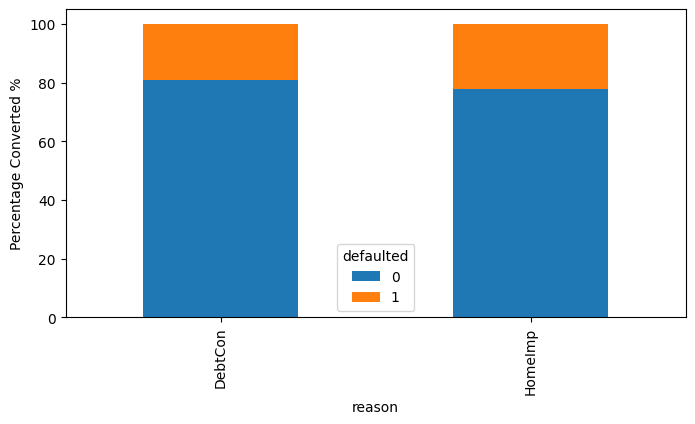

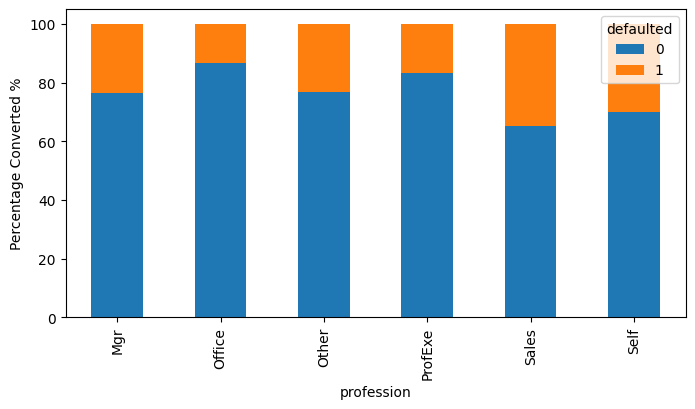

In [432]:
for c in cat_cols:
    (pd.crosstab(df[c], df['defaulted'], normalize= 'index')*100).plot(kind = 'bar', figsize = (8, 4), stacked = True)
    plt.ylabel('Percentage Converted %')

### **Multivariate Analysis**

In [255]:
def generate_heatmap(
        data_corr:pd.DataFrame, 
        vmin:float = 0, 
        vmax:float = 1, 
        annot:bool = True, 
        cmap:str | None = 'coolwarm', 
        figsize:tuple[int, int] = (15,10),
        fmt:str = '.2f'
    ):
    """
    Generates a heatmap of two or more numerical variables.

    Params:
        data_corr: pd.DataFrame, the computed pairwise correlation between columns.
        vmin: float, min correlation value to anchor the colormap to. Default=0.
        vmax: float, max correlation value to anchor the colormap to. Default=1.
        annot: bool, display the computed correlation value into the cell. Default=True.
        cmap: str, data to color mapping. Default='coolwarm'.
        figsize: tuple(int, int), the size of the resulting bar graph. Default: (15,10).
        fmt: str, decimal value rounding. Default='.2f'.
    
    Returns:
        None
    """
    plt.figure(figsize=figsize)
    sns.heatmap(
        data=data_corr, 
        vmin=vmin,
        vmax=vmax,
        annot=annot, 
        cmap=cmap, 
        fmt=fmt, 
        xticklabels=data_corr.columns, 
        yticklabels=data_corr.columns
    )

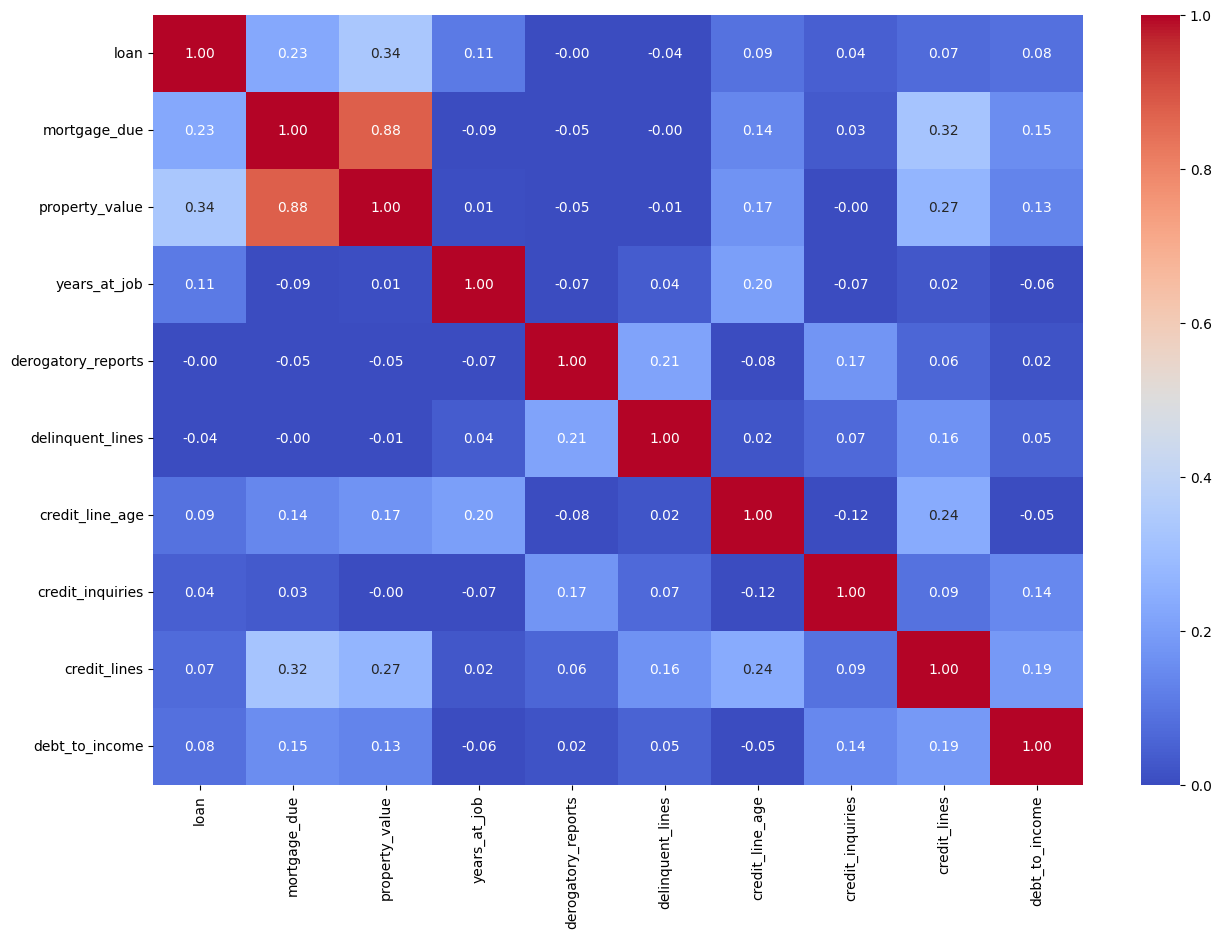

In [256]:
generate_heatmap(df[num_cols[1:]].corr())

**Observations**
- As expected, **mortgage_due** and **property_value** are highly correlated. 
    - **loan**, **credit_lines**, **debt_to_income** are also showing mild correlation with these two features. 
- **credit_lines** and **debt_to_income** also show mild correlation with eachother.
- **credit_line_age** and **years_at_job** also show mild correlation with each other. 

### **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

**Key Observations**
1. The *Debt to Income* ratio, (DTI), a key value in deciding a client's ability to pay back a loan is *larger on average* for those who defaulted but still within one standard deviation of the mean.
    - **debt_to_income**: `{paid: 33.25%, defaulted: 39.39%}`
    - $\mu=33.78,\, \sigma=8.60$
2. Client's who defaulted *on average* failed more often to make minimum required payments within 30-60 days on a credit line and also had more lines with serious deliquency on payments. 
    - **delinquent_lines**: `{paid: 0.24, defaulted: 1.23}`
    - **derogatory_reports**: `{paid: 0.13, defaulted: 0.70}`
3. For clients that didn't default on their loans they *on average* are given a *larger* **loan** amount but they also have higher **property_value** and larger **mortgage_due** values.
    - **loan**: `{paid: 19028, defaulted: 16922}`
    - **property_value**: `{paid: 102596, defaulted: 98173}`
    - **mortgage_due**: `{paid: 74829, defaulted: 69460}`
        - This feature shows the largest difference between those who defaulted and those who didn't at ~$5369$. 
4. Clients who didn't default have *slightly more* time at their current job, $9.15$ vs. $8.02$, but on average both these groups fell well within a standard deviation of the mean, $\mu=8.9,\, \sigma=7.57$.
    - It is notable that while the range of **years_at_job** is quite wide, the average number of years is quite high.
5. The *profession* of a client does seem to have an affect on whether or not they will default with those in *Sales* defaulting *more often* than other professions. 
    - However, it is important to note that there is a large number of clients in the data who have *Other* listed as their profession and in the **job** feature *Other* is the second *most likely* to default. 
6. The **reason** a client is requesting a loan doesn't appear to have much variation between its two categories, *Debt Consildation* and *Home Improvement*.
7. There does appear to be *Correlation* between several features. Most notably:
    - **mortgage_due**
    - **property_value** 
    - **loan**
    - **credit_lines**
    - **debt_to_income**  

# Building the Models
- Preprocess the data specific to the model type
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

## Model Prediction Error Analysis

**Possible Model Prediction Errors**
1. **False Positive:** Predicting a client *will* default when the client *doesn't* default.
2. **False Negative:** Predicting a client *will not* default when the client *does* default.

**Critical Error**</br>
Predicting a client *will not* default when the client *does* default.
- This is important because the bank will lose future profits via the interest on the loan if the client defaults.

**Reduction of False Negatives**</br>
For our use case, the best performance metric to use would be Recall.
**Recall** measures the proportion of *True Positives* to all *actual* positives.</br> 

$\dfrac{TP}{TP + FN}$
    
Thereby, if we *maximize* Recall we *minimize* the probablity of *False Negatives*. In doing so we can:
1. Better help the Consumer Credit Department identify which clients are more likely to default
2. Locate more accurately the factors that might lead a client to default.
3. Provide the Consumer Credit Department with the best model to predict whether or not a client will default on the loan they are requesting. 

**A Note on Other Metrics**</br>
A *Confusion Matrix* is used to measure the performance of a classification algorithm. We will be getting the values of *True Positive* and *False Negative* from this matrix. This matrix also provides the *True Negative* and *False Positive* values used in **Accuracy** and **Precision** classification performance metrics. 

While **Recall** is the metric will be primarily using, it is important to also be able to calculate the other metrics so that we can get the best picture of our model. 

### Metrics Scoring

In [272]:
# Confusion Matrix Function - src: Case_Study_Employee_Attrition_Prediction
def metrics_score(actual, predicted, tick_labels):
    """ 
    For a classification model:
        - Get the classification report to view model performance metrics on both class labels(0,1).
        - Compute the Confusion Matrix for the model.
        - Visualize the Confusion Matrix via a heatmap.
    Params:
        actual: the actual target value vector.
        predicted: the estimated target value vector from the model.
        tick_labels: tuple(str), the labels for the confusion matrix.
    Returns:
        None
    """

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = tick_labels, yticklabels = tick_labels)
    
    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

## Treating Missing Values
- numerical feature cols will have missing values replaced with the median of that column
- categorical feature cols will have missing values replaced with the mode of that column

In [260]:
def num_col_missing(df: pd.DataFrame, cols:list[str]):
    """ 
    Handle missing values in continuous variable feature columns 
    by replacing all missing values with the median of that feature column.

    Params:
        df: pd.DataFrame, the dataset to handle missing values for.
        cols: list[str], the continuous feature column labels that contain missing values.
    """
    # iterate over numerical cols sans target
    for n in df[cols]:
        # get median for col
        median = df[n].median()
        # fill missing vals in col with median
        df[n] = df[n].fillna(median)
        
    return df

In [261]:

def cat_col_missing(df:pd.DataFrame, cols:list[str]):
    """ 
    Handle missing values in categorical variable feature columns 
    by replacing all missing values with the mode of that feature column.

    Params:
        df: pd.DataFrame, the dataset to handle missing values for.
        cols: list[str], the categorical feature column labels that contain missing values.
    """
    # iterate over categorical cols
    for c in df[cols]:
        # get mode for col
        mode = df[c].mode()[0]
        # fill missing vals in col with mode
        df[c] = df[c].fillna(mode)
        
    return df

## **Logistic Regression**

In [433]:
# deep copy DataFrame to treat outliers for logistic regression
df_log = df.copy()

### Data Pre-processing

#### Treating Outliers
We will treat the outliers for our logistic regression only because outliers can affect the fit of the model.

array([[<Axes: title={'center': 'loan'}>,
        <Axes: title={'center': 'mortgage_due'}>,
        <Axes: title={'center': 'property_value'}>],
       [<Axes: title={'center': 'years_at_job'}>,
        <Axes: title={'center': 'derogatory_reports'}>,
        <Axes: title={'center': 'delinquent_lines'}>],
       [<Axes: title={'center': 'credit_line_age'}>,
        <Axes: title={'center': 'credit_inquiries'}>,
        <Axes: title={'center': 'credit_lines'}>],
       [<Axes: title={'center': 'debt_to_income'}>, <Axes: >, <Axes: >]],
      dtype=object)

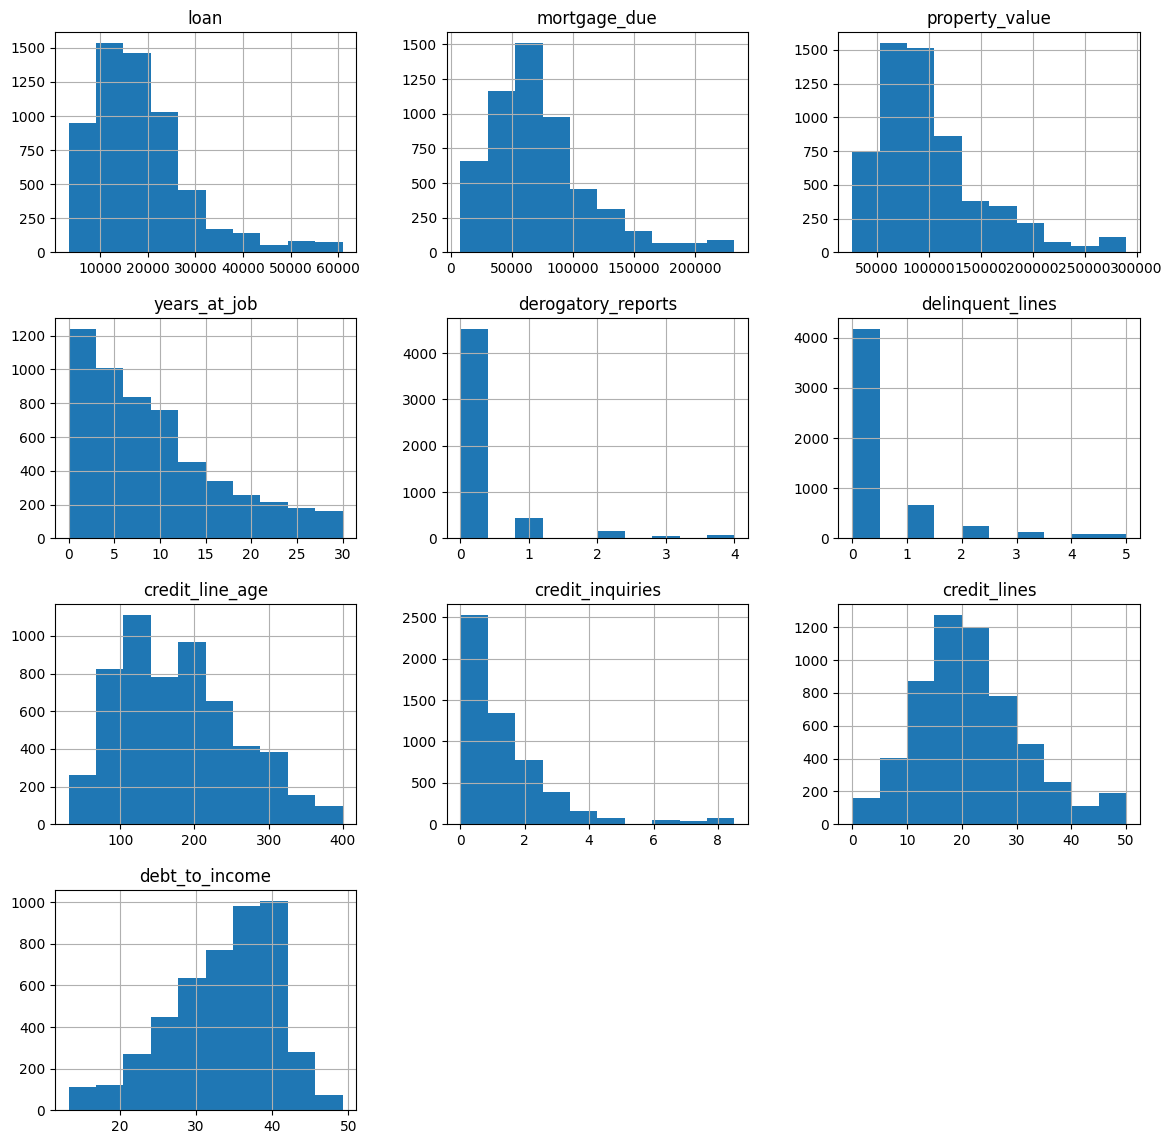

In [434]:
# iterate over numerical feature columns
for n in df_log[num_cols[1:]]:
    # set the upper and lower whisker values per feature
    lower_whisker, upper_whisker = df_log[n].quantile([0.01, 0.99])
    # update feature in DataFrame
    df_log[n] = np.clip(df_log[n], lower_whisker, upper_whisker)

# visualize the change
df_log[num_cols[1:]].hist(figsize=(14,14))

#### Treat Missing Values

In [435]:
# treat missing values in numerical columns
df_log = num_col_missing(df_log, num_cols[1:])

In [436]:
# treat missing values in categorical columns
df_log = cat_col_missing(df_log, cat_cols)

In [437]:
# confirm missing values are handled
df_log.isna().sum()

defaulted             0
loan                  0
mortgage_due          0
property_value        0
reason                0
profession            0
years_at_job          0
derogatory_reports    0
delinquent_lines      0
credit_line_age       0
credit_inquiries      0
credit_lines          0
debt_to_income        0
dtype: int64

####  One-Hot Encoding of Categorical Variables

In [438]:
df_log = pd.get_dummies(data=df_log, columns=cat_cols, drop_first=True)

#### Split data in to Train and Test

In [439]:
# separate target from features
Y_log = df_log['defaulted']
X_log = df_log.drop(['defaulted'], axis=1)

In [440]:
# split data into training and test sets
x_log_train, x_log_test, y_log_train, y_log_test = train_test_split(X_log, Y_log, test_size=30, random_state=1, stratify=Y_log)

### Build Logistic Regression

In [449]:
def log_regression(x:list, y:list):
    # save Logistic Regression into variable, start with no regularization
    lr = LogisticRegression()
    # fit LR to training data
    lr.fit(x, y)

    return lr


#### Model Performance Evaluation

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4747
           1       0.68      0.30      0.42      1183

    accuracy                           0.83      5930
   macro avg       0.76      0.63      0.66      5930
weighted avg       0.81      0.83      0.81      5930



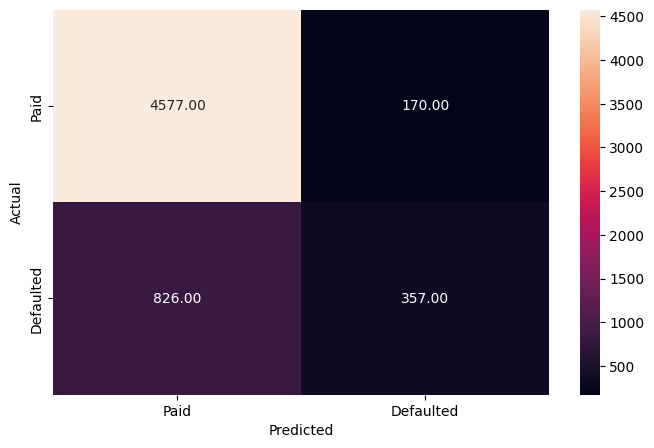

In [450]:
lr = log_regression(x_log_train, y_log_train)
# predict on training set
y_log_pred_train = lr.predict(x_log_train)
# check performance on training set
metrics_score(y_log_train, y_log_pred_train, ('Paid', 'Defaulted'))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        24
           1       1.00      0.17      0.29         6

    accuracy                           0.83        30
   macro avg       0.91      0.58      0.60        30
weighted avg       0.86      0.83      0.78        30



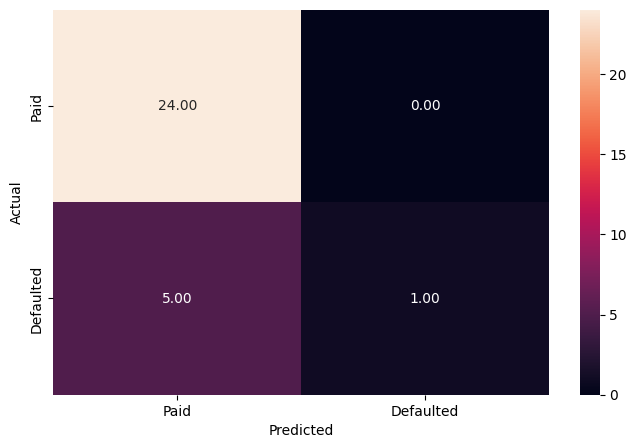

In [451]:
# Checking performance on test set
y_log_pred_test = lr.predict(x_log_test)
metrics_score(y_log_test, y_log_pred_test, ('Paid', 'Defaulted'))

**Observations**
- We can see that the Recall for class 1(Defaulted) are quite poor on both the training and test sets. 

### Model Improvement

#### Feature Weights

In [458]:
coefs = lr.coef_.T
labels = X_log.columns

coef_df = pd.DataFrame(coefs, index=labels, columns=['coefficients']).sort_values(by='coefficients', ascending=False)

coef_df

,coefficients
delinquent_lines,0.635374
credit_inquiries,0.369940
derogatory_reports,0.323457
profession_Self,0.020635
reason_HomeImp,0.015507
profession_Sales,0.012552
debt_to_income,0.006272
property_value,0.000002
mortgage_due,-0.000005
loan,-0.000027


**Getting the Odds**
- the coefficients of a logistic regression are the log of the odds that a client will default. Therefore, if take the exponetial of the coefficients for each feature we'll get the odds a client will default given that feature.

In [460]:
odds = np.exp(lr.coef_[0])

pd.DataFrame(odds, x_log_train.columns, columns=['odds']).sort_values(by='odds', ascending=False)

,odds
delinquent_lines,1.887727
credit_inquiries,1.447648
derogatory_reports,1.381896
profession_Self,1.020849
reason_HomeImp,1.015627
profession_Sales,1.012631
debt_to_income,1.006292
property_value,1.000002
mortgage_due,0.999995
loan,0.999973



##### Observations

**Features that Positively Affect Default Rate** increasing these will increase defaulting:
- delinquent_lines
- credit_inquiries
- derogatory_reports
- debt_to_income
- job_Self
- job_Sales
- reason_HomeImp
- property_value

**Features that Negatively Affect Default Rate** decreasing these will decrease defaulting:
- mortgage_due
- job_Other
- loan
- job_ProfExe
- credit_lines
- credit_line_age
- job_Office
- years_at_job

**Odds Analysis**
- The odds of a client *will* default for the features that **Positively Affect Default Rate** are all $\gt\,1$ times more than a client who *won't*. Notably:
    - **delinquent_lines** shows that a client is ~$1.88$ times more likely to default if they have delinquent lines.
    - **credit_inquiries** shows that a client is ~$1.45$ times more likely to default if they have credit inquiries.
    - **derogatory_reports** shows that a client is ~$1.38$ times more likely to default if they have derogatory reports.

- The odds of a client *won't* default for the features that **Negatively Affect Default Rate** are all $\lt\,1$ times less than a client who *will*. 
    - **job_Office** appears to be the 'best' at $0.93$ times less likely to default.

#### Precision-Recall Curve
Although we decided earlier that **Recall** would be the best performance metric for our use case, we saw that a Logistic Regression with a threshold of $0.5$ performed very poorly. We can potentially improve that by trying a different threshold value. 

The **Precision-Recall Curve** can help determine what a more ideal threshold for the data would be by looking at where the *Precision* and *Recall* curves intersect.

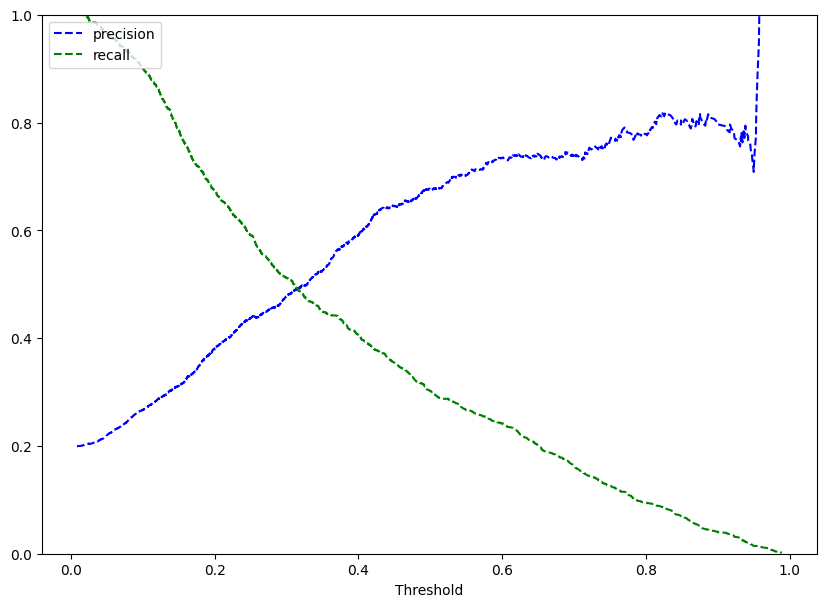

In [461]:
# predict_proba() gives the probability of each observation belonging to each class 
# - gives us soft predictions (probability of each class, yes/no attrite given feature)
y_log_scores = lr.predict_proba(x_log_train)

# compute and save the precision-recall pairs for different thresholds, and the associated thresholds
precisions_lr, recalls_lr, thresholds_lr = precision_recall_curve(y_log_train, y_log_scores[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lr, precisions_lr[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lr, recalls_lr[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

**Observations**
- We can see that the precision and recall are more balanced at a threshold of $0.35$. 

#### Applying new Threshold: $0.35$

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      4747
           1       0.53      0.45      0.48      1183

    accuracy                           0.81      5930
   macro avg       0.70      0.67      0.68      5930
weighted avg       0.80      0.81      0.80      5930



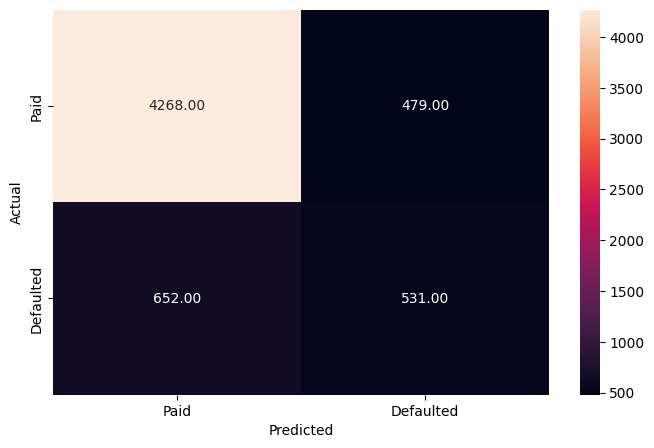

In [462]:
new_threshold = 0.35
y_log_pred_train = lr.predict_proba(x_log_train)
# Subsetting our predictions to be all the variables > our threshold. 
metrics_score(y_log_train, y_log_pred_train[:,1] > new_threshold, ('Paid', 'Defaulted'))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        24
           1       0.50      0.33      0.40         6

    accuracy                           0.80        30
   macro avg       0.67      0.62      0.64        30
weighted avg       0.78      0.80      0.78        30



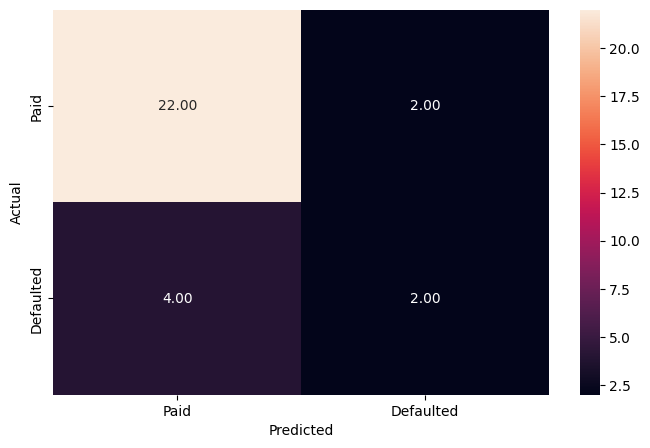

In [463]:
new_threshold = 0.35
y_log_pred_test = lr.predict_proba(x_log_test)
# Subsetting our predictions to be all the variables > our threshold. 
metrics_score(y_log_test, y_log_pred_test[:,1] > new_threshold, ('Paid', 'Defaulted'))

**Observations**<br>
Our **Recall** scores on class 1 (Defaulted) on the train and test sets have improved markedly<br>

**Recall on class 1**
threshold|train|test
---|:---:|---: 
0.5|0.30|0.17
0.35|0.45|0.33

However, we have lost some accuracy and precision (on class 1).<br>

**Accuracy**
threshold|train|test
---|:---:|---: 
0.5|0.83|0.83
0.35|0.81|0.80

**Precision on class 1**
threshold|train|test
---|:---:|---: 
0.5|0.68|1.00
0.35|0.53|0.50

## **Decision Tree**

### Data Pre-processing

#### Treat Missing Values

In [464]:
# treat missing values in numerical columns
df = num_col_missing(df, num_cols[1:])

In [465]:
# treat missing values in categorical columns
df = cat_col_missing(df, cat_cols)

In [466]:
# confirm missing values are handled
df.isna().sum()

defaulted             0
loan                  0
mortgage_due          0
property_value        0
reason                0
profession            0
years_at_job          0
derogatory_reports    0
delinquent_lines      0
credit_line_age       0
credit_inquiries      0
credit_lines          0
debt_to_income        0
dtype: int64

####  One-Hot Encoding of Categorical Variables

In [467]:
df = pd.get_dummies(data=df, columns=cat_cols, drop_first=True)

#### Outliers
We will not be treating outliers for the Decision Tree because decisions are made based on thresholds not magnitudes. 

#### Split data in to Train and Test

In [468]:
# separate target from features
Y = df['defaulted']
X = df.drop(['defaulted'], axis=1)

In [469]:
# split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=30, random_state=1, stratify=Y)

### Build Decision Tree

In [470]:
# Build the Decision Tree Model
d_tree = DecisionTreeClassifier(class_weight='balanced', random_state=1)
# 'Fit' our data to the Decision Tree Model
d_tree.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


### Model Performance Evaluation

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4747
           1       1.00      1.00      1.00      1183

    accuracy                           1.00      5930
   macro avg       1.00      1.00      1.00      5930
weighted avg       1.00      1.00      1.00      5930



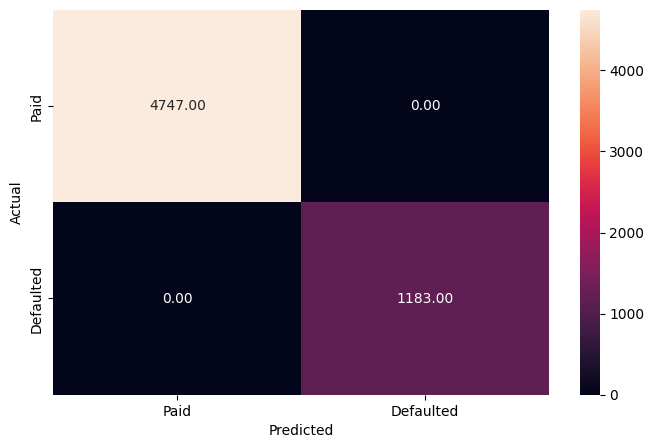

In [471]:
# Training Dataset Model Performance
# get y_predictions
y_train_pred = d_tree.predict(x_train)

# run performance eval and get confusion matrix
metrics_score(y_train, y_train_pred, ('Paid', 'Defaulted'))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        24
           1       0.57      0.67      0.62         6

    accuracy                           0.83        30
   macro avg       0.74      0.77      0.75        30
weighted avg       0.84      0.83      0.84        30



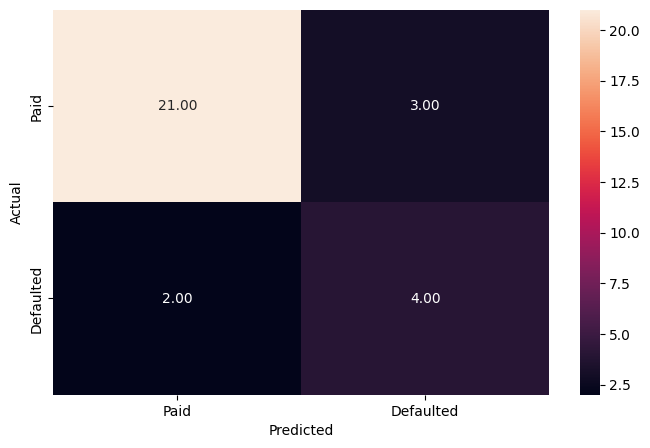

In [472]:
# Test Dataset Model Performance
# get y_predictions
y_test_pred = d_tree.predict(x_test)

# run performance eval and get confusion matrix
metrics_score(y_test, y_test_pred, ('Paid', 'Defaulted'))

**Observations**<br>
Our model is overfitting on the training data, and performance on the test set could be better. 

#### Feature Importance

In [473]:
# get the feature importances
feature_importances = d_tree.feature_importances_
# Create a feature by importance DataFrame
# get the feature labels
labels = X.columns
# create DataFrame and sort the features from most important to least important
importance_df = pd.DataFrame(feature_importances, index=labels, columns=['Importance']).sort_values(by='Importance', ascending=False)
# display feature importance DataFrame
importance_df

,Importance
debt_to_income,0.463206
credit_line_age,0.097737
credit_lines,0.070523
property_value,0.066888
mortgage_due,0.063379
years_at_job,0.061984
loan,0.053054
delinquent_lines,0.047446
credit_inquiries,0.034312
derogatory_reports,0.014581


**Visualize to get a better idea of feature importance**

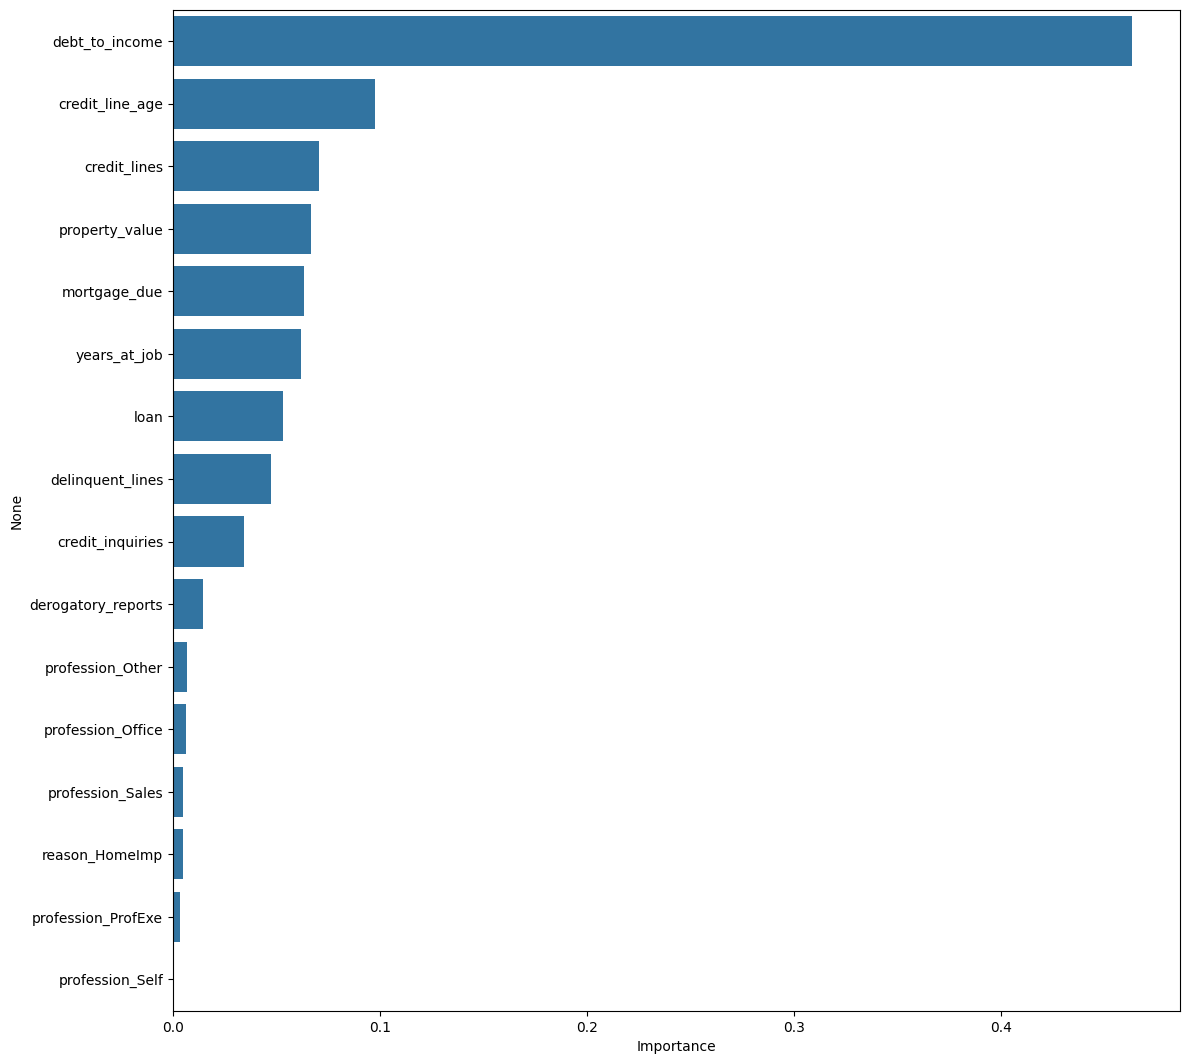

In [474]:
# visualize feature importances as a bar graph
plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance,y=importance_df.index);

**Observations**
- The **debt_to_income** ratio appears to be the most important feature when determining if a client will default. It's importance is significantly larger than that of the nearest feature **credit_line_age**.

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


**Hyperparameters to Tune**
- *class_weight*: {'balanced', {0:20, 1:0.80}}
    - Determines how much weight each class gets. 
        - The weight of each class is dictated the percent proportion of the data that the class makes up. We then apply it's weight to the opposite class to balance the decisions. 
- *criterion*: {gini, entropy}
    - The impurity measure
- *max_depth*: {2, 3, 4, 5, 6, 7, 8, 9}
    - The depth of the tree
- *min_samples_leaf*: {5, 10, 20, 25}
    - The number of samples required to be at a leaf node. 

In [475]:
# GridSearch Hyperparameter Tuning
# create the classifier
d_tree_tuner = DecisionTreeClassifier(random_state=1)

# set parameter grid to chose from 
parameters = {'class_weight':['balanced', {0:20, 1:0.80}], 
    'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]}

# Set the type of scoring to use to Recall for parameter combination comparisons, 
# and make comparisons on class=1(converted).
scorer = metrics.make_scorer(recall_score, pos_label=1)

# run grid search using k=5 for cross-validation
gridCV = GridSearchCV(d_tree_tuner, parameters, scoring=scorer, cv=5)

# fit the cross-validation 
gridCV = gridCV.fit(x_train, y_train)

# save best parameter combination
d_tree_estimator = gridCV.best_estimator_

# fit best classifier to data
d_tree_estimator.fit(x_train, y_train)


,criterion,'entropy'
,splitter,'best'
,max_depth,np.int64(9)
,min_samples_split,2
,min_samples_leaf,25
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


### Model Performance Evaluation

#### Check tuned classifier performance on training set

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      4747
           1       0.59      0.87      0.70      1183

    accuracy                           0.85      5930
   macro avg       0.78      0.86      0.80      5930
weighted avg       0.89      0.85      0.86      5930



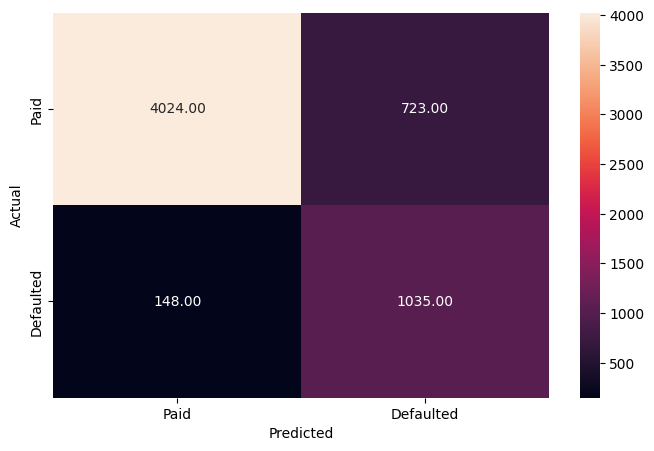

In [ ]:
# Tuned Training Dataset Model Performance
# get y_predictions
y_train_pred_tuned = d_tree_estimator.predict(x_train)
# run performanc eval and get confusion matrix
metrics_score(y_train, y_train_pred_tuned, ('Paid', 'Defaulted'))

#### Checking tuned classifier test data performance 

              precision    recall  f1-score   support

           0       0.95      0.83      0.89        24
           1       0.56      0.83      0.67         6

    accuracy                           0.83        30
   macro avg       0.75      0.83      0.78        30
weighted avg       0.87      0.83      0.84        30



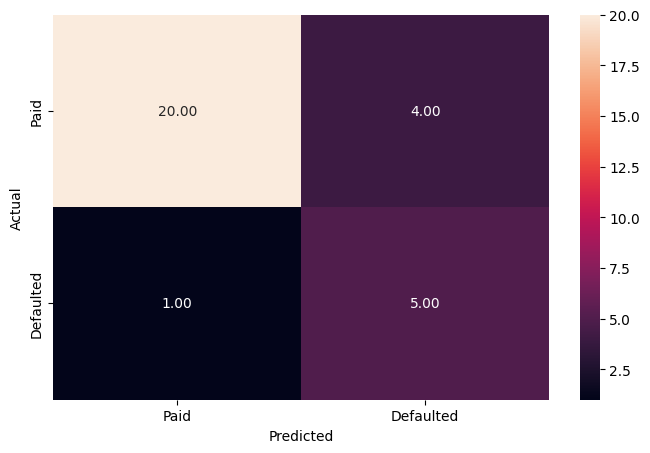

In [348]:
# Tuned Training Dataset Model Performance
# get y_predictions
y_test_pred_tuned = d_tree_estimator.predict(x_test)
# run performanc eval and get confusion matrix
metrics_score(y_test, y_test_pred_tuned, ('Paid', 'Defaulted'))

#### Observations

**Hyperparameters**
- *class_weight*: 'balanced' 
- *criterion*: entropy
- *max_depth*: 9
- *min_samples_leaf*: 25

**Performance**<br>
We can see that the overfitting has resolved itself on the training set, and the **Recall** on the test set has improved. <br>

**Recall on class 1**
 ~|train|test
---|:---:|---: 
untuned|1.00|0.67
tuned|0.87|0.83

**Accuracy**
~|train|test
---|:---:|---: 
untuned|1.00|0.83
tuned|0.85|0.83

**Precision on class 1**
threshold|train|test
---|:---:|---: 
untuned|1.00|0.57
tuned|0.59|0.56

#### Feature Importance

In [ ]:
# get the feature importances
feature_importances = d_tree_estimator.feature_importances_
# Create a feature by importance DataFrame
# get the feature labels
labels = X.columns
# create DataFrame and sort the features from most important to least important
importance_tuned_df = pd.DataFrame(feature_importances, index=labels, columns=['Importance']).sort_values(by='Importance', ascending=False)
# display feature importance DataFrame
importance_tuned_df

,Importance
debt_to_income,6.103571e-01
delinquent_lines,9.396717e-02
credit_line_age,5.833140e-02
loan,5.377553e-02
credit_lines,4.827734e-02
mortgage_due,4.076204e-02
years_at_job,3.915598e-02
derogatory_reports,1.883036e-02
property_value,1.544015e-02
job_ProfExe,9.469156e-03


**Visualize to get a better idea of feature importance**

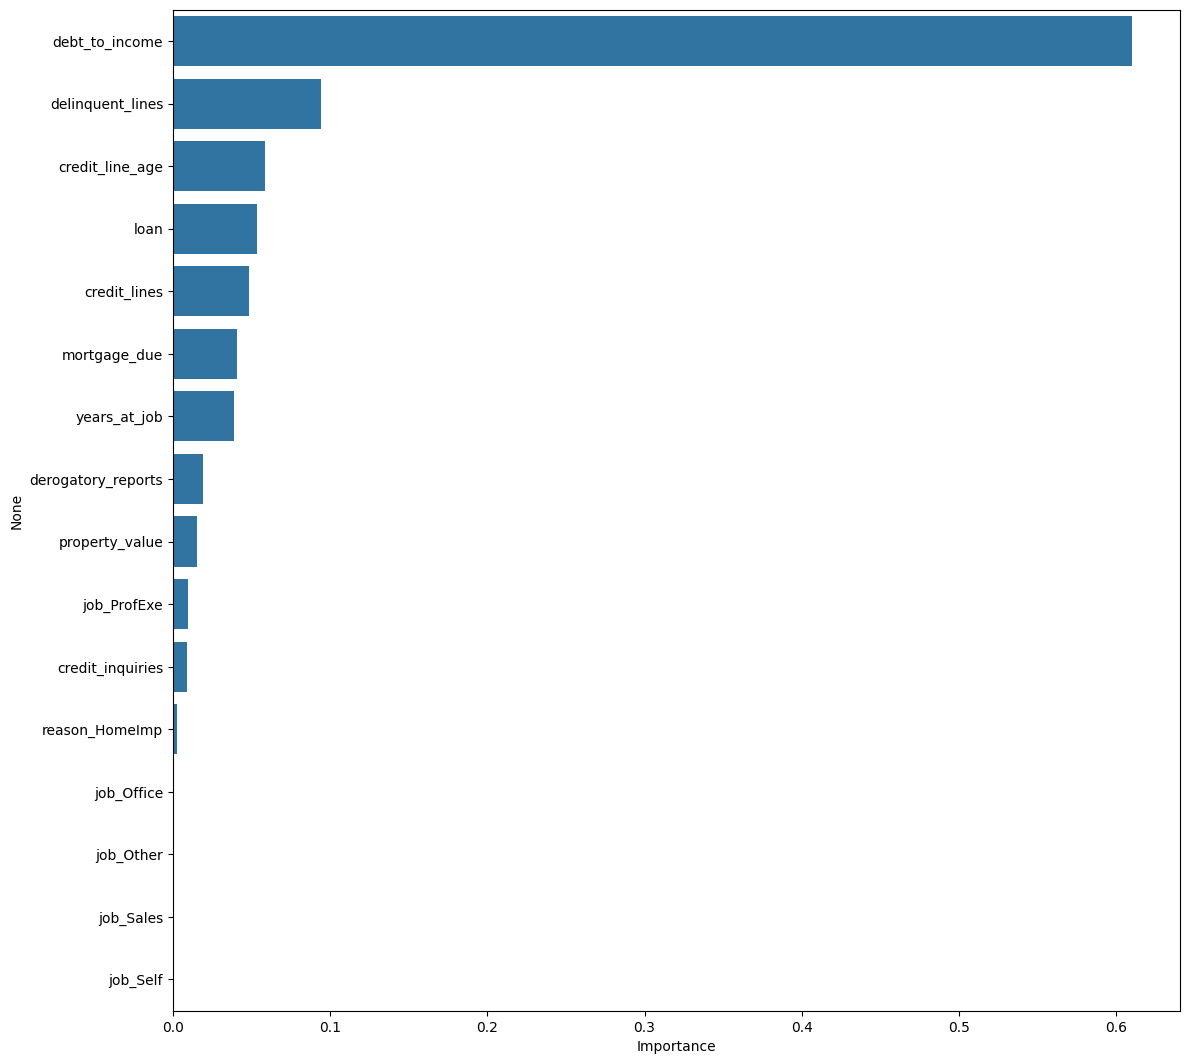

In [368]:
# visualize feature importances as a bar graph
plt.figure(figsize = (13, 13))

sns.barplot(x=importance_tuned_df.Importance,y=importance_df.index);

**Observations**<br>
The most important feature remains **debt_to_income** but interesting, in our tuned tree, the next most important feature is **delinquent_lines** which is different from our untuned tree. 

#### Visualizing the Tuned Decision Tree

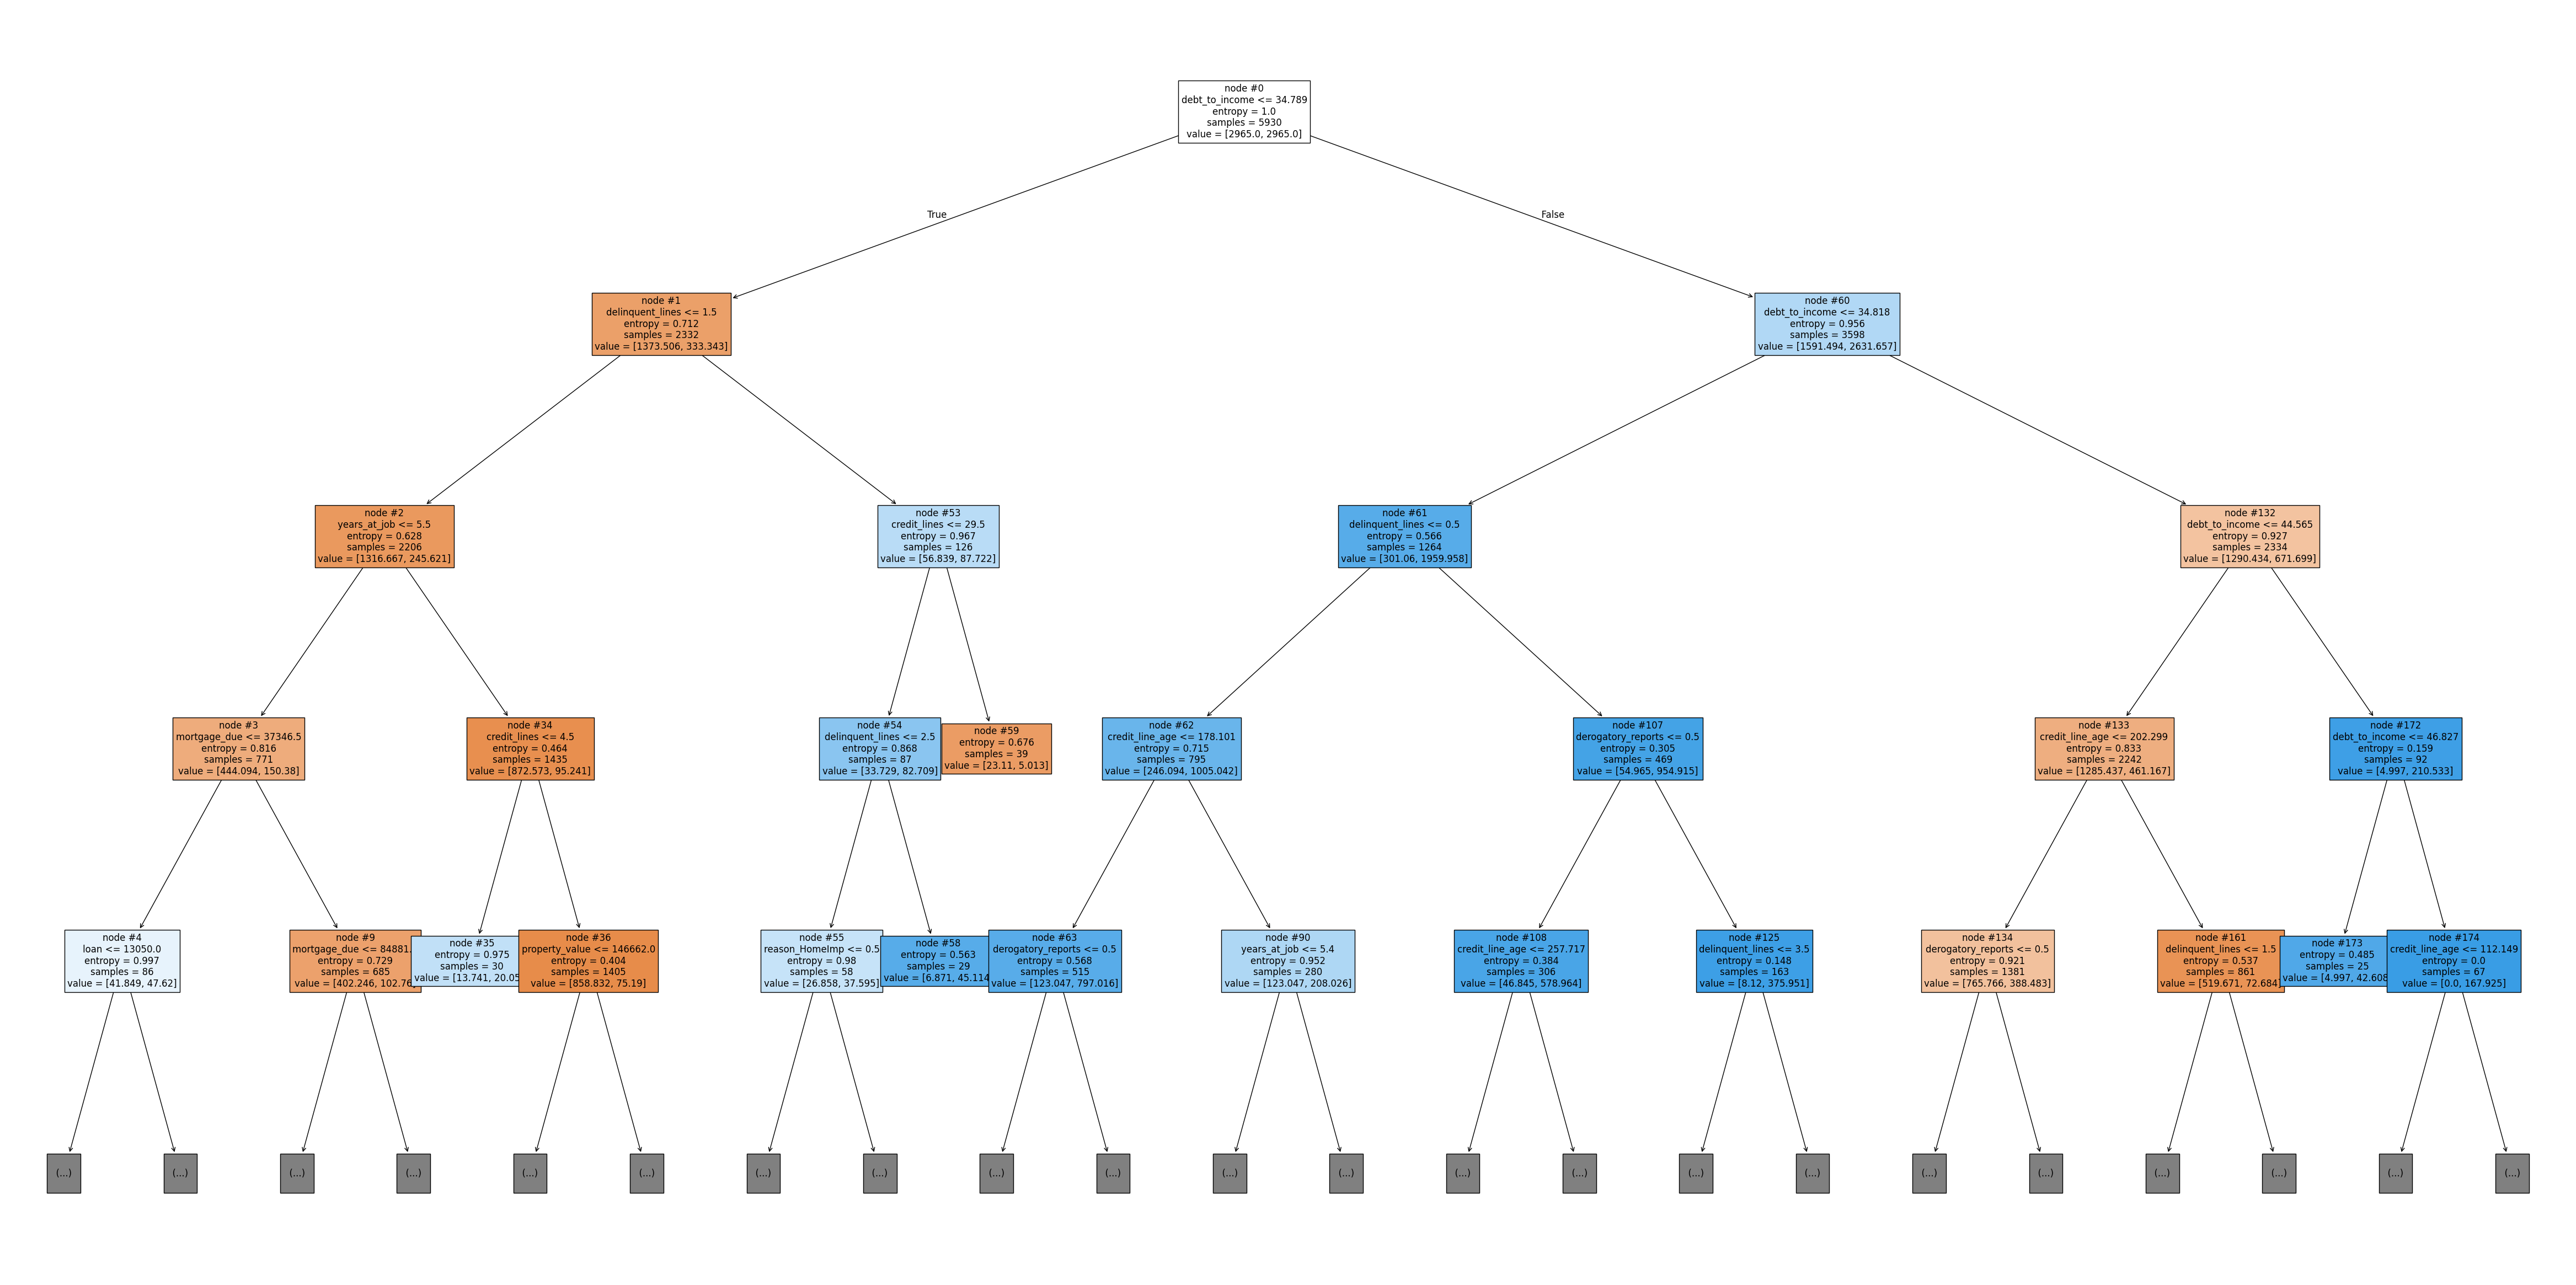

In [ ]:
# get the list of features in the Decision Tree
features = list(X.columns)
# set the plot dimensions
plt.figure(figsize=(60,30))
# plot the decision tree with max_depth = 4 because layer 4 is the layer after the first leaf_node is found
tree.plot_tree(d_tree_estimator, max_depth=4, feature_names=features, filled = True, fontsize = 12, node_ids = True, class_names = None)
plt.show()

##### Observations

*NOTE:* blue leaves represent a client defaulted, and orange leaves represent client didn't default. 
- Clients who have a **debt_to_income**(DTI) ratio of $\geq 34.789\%$ are more likely to default than those who have a ratio less than this threshold. 
    - If we look even further down the tuned tree, we can that as the DTI increases the more clients are found in nodes with high likelihoods of defaulting. 
    - Ultimately, one of our *defaulted leaf_nodes*(class 1) is deliniated as $34.789\% \geq DTI\,\leq 46.837\%$ with 25 clients in this node. 
- We see that our second most important feature **delinquent_lines** is also critical in the decision process.
    - A *defaulted leaf_nodes*(class 1) is deliniated as having of $2.5 \geq lines$ with 29 clients in this node. 
- We also that the number of **credit_lines** a client has leads to 2 nodes.  
    - *defaulted leaf_nodes*(class 1) path: 
        - $DTI \leq 34.789$ --> 
            - $delinquent\,lines \leq 1.5$ -->
                - $years\,at\,job \leq 5.5$ -->
                    - $credit\,lines 4.5 \leq$
    - *paid leaf_nodes*(class 0) path:
        - $DTI\,\leq 34.789$ --> 
            - $delinquent\,lines\,\geq 1.5$ -->
                - $credit\,lines\,\geq 29.5  $

## **Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

### Data Pre-processing
We will use the same data processed for the Decision Tree. 

### Build the Random Forest

In [355]:
# build a random forest classifier
rf = RandomForestClassifier(class_weight='balanced', random_state=1)

# fit the classifier to the training data
rf.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Model Performance Evaluation

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4747
           1       1.00      1.00      1.00      1183

    accuracy                           1.00      5930
   macro avg       1.00      1.00      1.00      5930
weighted avg       1.00      1.00      1.00      5930



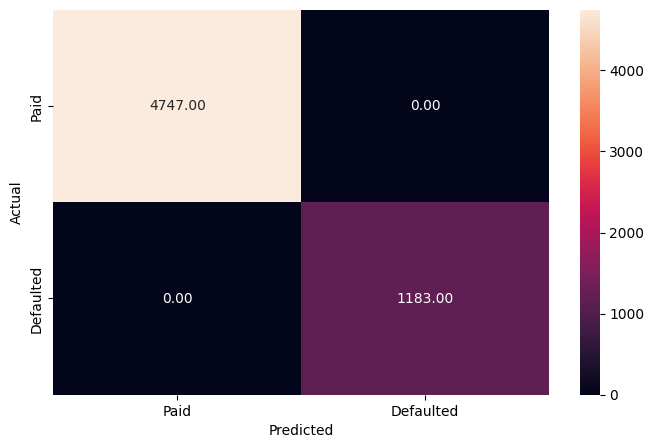

In [356]:
# Train Dataset Model Performance
# get y_predictions
rf_y_train_pred = rf.predict(x_train)

# run performance eval and get confusion matrix
metrics_score(y_train, rf_y_train_pred, ('Paid', 'Defaulted'))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        24
           1       0.57      0.67      0.62         6

    accuracy                           0.83        30
   macro avg       0.74      0.77      0.75        30
weighted avg       0.84      0.83      0.84        30



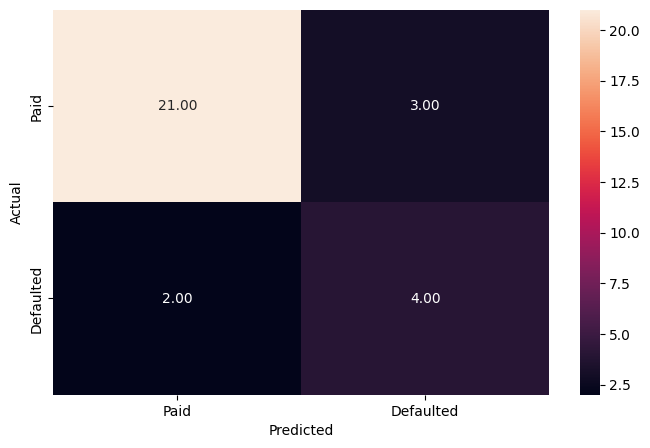

In [357]:
# Test Dataset Model Performance
# get y_predictions
rf_y_test_pred = d_tree.predict(x_test)

# run performance eval and get confusion matrix
metrics_score(y_test, rf_y_test_pred, ('Paid', 'Defaulted'))

**Observations**<br>
The Random Forest Classifier is overfitting on the training data, and performing okay on the test data for class 1, $0.67$.

#### Feature Importance Check

<Axes: xlabel='Importance', ylabel='None'>

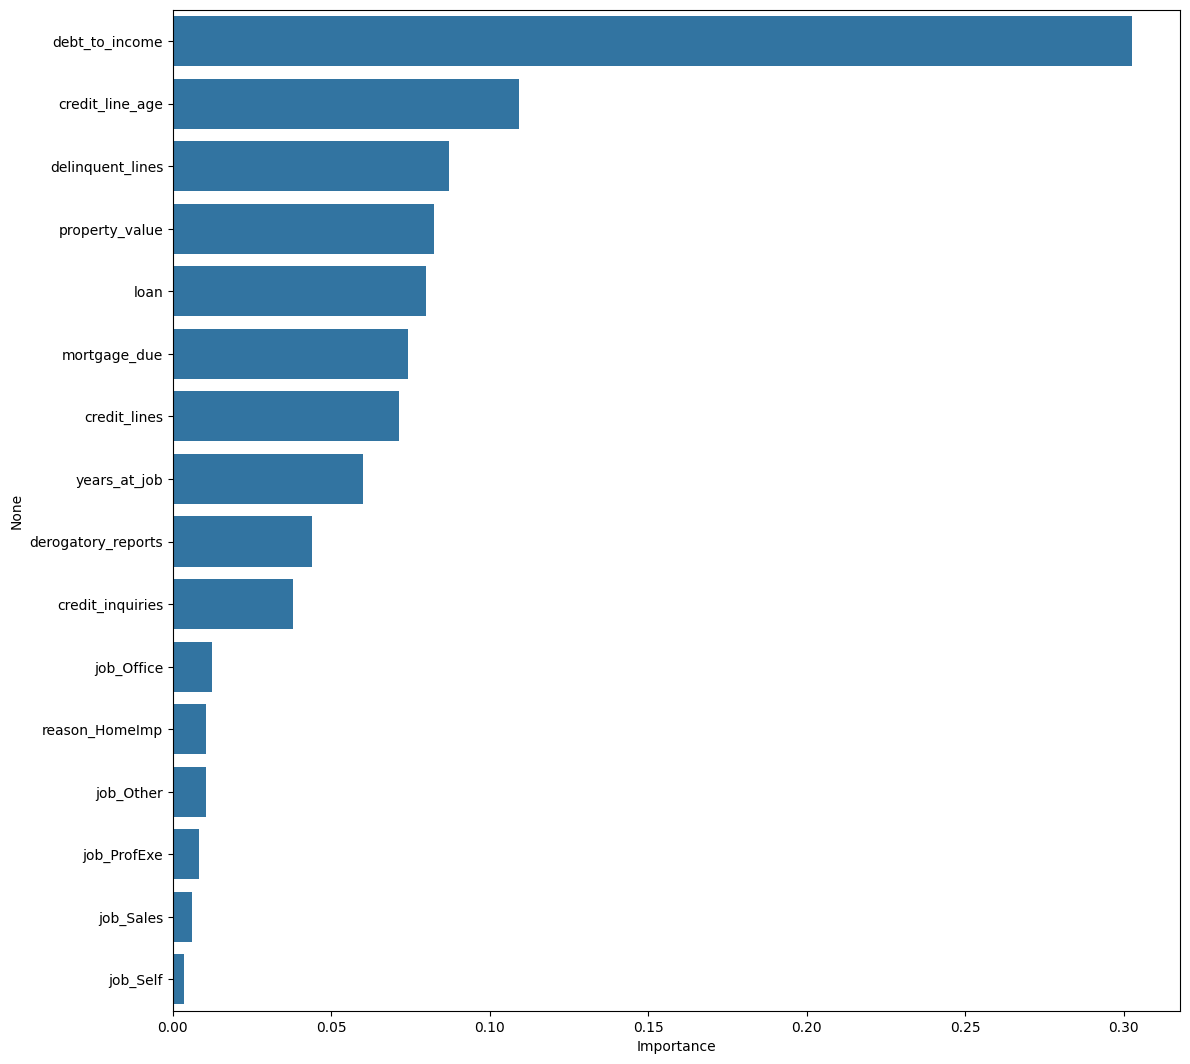

In [363]:
# get the feature importances from the Random Forest
rf_importances = rf.feature_importances_
# get the feature labels
rf_cols = X.columns
# create a dataframe of row=feature_name col=Importance 
rf_importance_df = pd.DataFrame(rf_importances, index=rf_cols, columns=['Importance']).sort_values(by='Importance', ascending=False)
# plot feature against importance value
plt.figure(figsize=(13,13))
sns.barplot(x=rf_importance_df['Importance'], y=rf_importance_df.index)

**Observations**
- Once again **debt_to_income**, **credit_line_age** and **delinquent_lines** appear to be the most important features. 

### **Random Forest Classifier Hyperparameter Tuning**

**Hyperparameters to Tune**
- *n_estimators*: {110, 120}
    - number of trees in the forest
- *max_depth*: {3, 4, 5}
    - The depth of the tree.
    - NOTE: depth selections are made based on where the tuned Decision Tree first found a leaf_node, depth = 3, and then giving two above. 
- *min_samples_leaf*: {20, 25, 30}
    - min number of samples required to be a leaf node. 
    - NOTE: setting one below and one above the min_samples_leaf from the tuned Decision Tree. 
- *max_features*: {0.8, 0.9, 'auto'}
    - max number of features to consider when looking at the best split. (70, 90)% or auto.
- *max_samples*: {0.9, 1}
    - max number of samples to take from each feature to train each tree. (90, 100)%.

*NOTE*: 
1. Since we saw in our Decision Tree that 'entropy' was the best impurity measure for our data we can set the *Criterion* hyperparamter to 'entropy'.
2. Since we saw in our Decision Tree that 'balanced' was the best *class_weight* we will set the Random Forest Hyperparameter this way.

In [358]:
# set classifier to random forest
rf_tuned = RandomForestClassifier(class_weight='balanced', criterion='entropy', random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [3, 4, 5],
    "min_samples_leaf": [20, 25, 30],
    "max_features": [0.8, 0.9, 'auto'],
    "max_samples": [0.9, 1]
             }
# Set the type of scoring to use to Recall for parameter combination comparisons, 
# and make comparisons on class=1(converted).
scorer = metrics.make_scorer(recall_score, pos_label=1)

# run grid search using k=5 for cross-validation
gridCV = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5)

# fit the cross-validation 
gridCV = gridCV.fit(x_train, y_train)

# save best parameter combination for our estimator 
rf_estimator = gridCV.best_estimator_


In [359]:
rf_estimator.fit(x_train, y_train)

,n_estimators,120
,criterion,'entropy'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,20
,min_weight_fraction_leaf,0.0
,max_features,0.8
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Model Performance Evaluation

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      4747
           1       0.63      0.79      0.70      1183

    accuracy                           0.86      5930
   macro avg       0.79      0.84      0.81      5930
weighted avg       0.88      0.86      0.87      5930



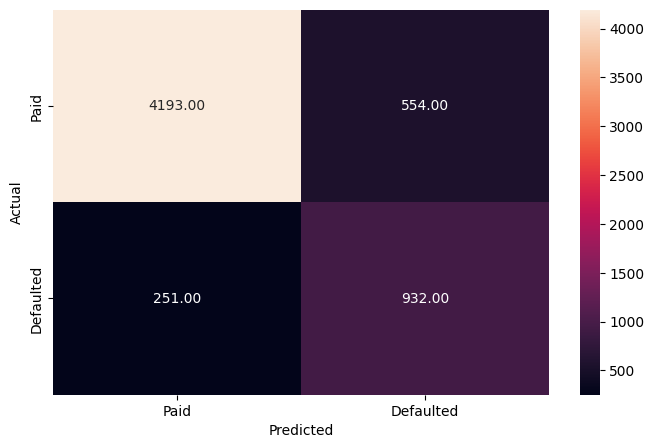

In [ ]:
# Tuned Training Dataset Model Performance
y_pred_train_rf_tuned = rf_estimator.predict(x_train)
# run performance eval and get confusion matrix
metrics_score(y_train, y_pred_train_rf_tuned, ('Paid', 'Defaulted'))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        24
           1       0.60      1.00      0.75         6

    accuracy                           0.87        30
   macro avg       0.80      0.92      0.83        30
weighted avg       0.92      0.87      0.88        30



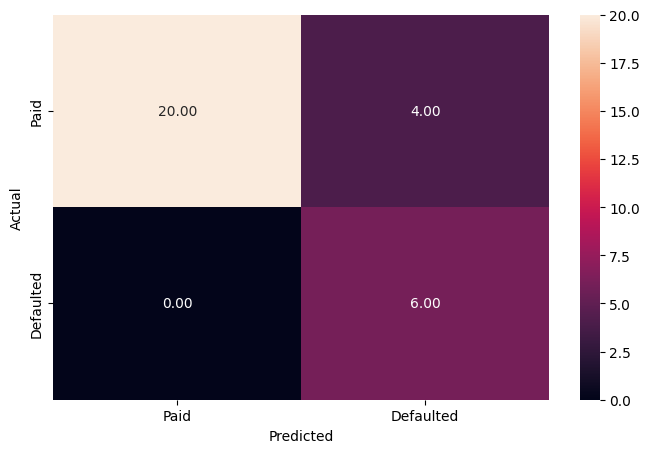

In [362]:
# Tuned Test Dataset Model Performance
y_pred_test_rf_tuned = rf_estimator.predict(x_test)
# run performance eval and get confusion matrix
metrics_score(y_test, y_pred_test_rf_tuned, ('Paid', 'Defaulted'))

**Observations**
- The Tuned Random Forest on the training set appears to no longer be overfitting on the training data and has performed quite well on the test data. 

#### Feature Importance
Since we can't visualize the decisions made in a Random Forest like we can with a singular Decision Tree, we will look at the relative feature importances **after tuning** and compare them to **before tuning** to see how the decisions may have changed.

<Axes: xlabel='Importance', ylabel='None'>

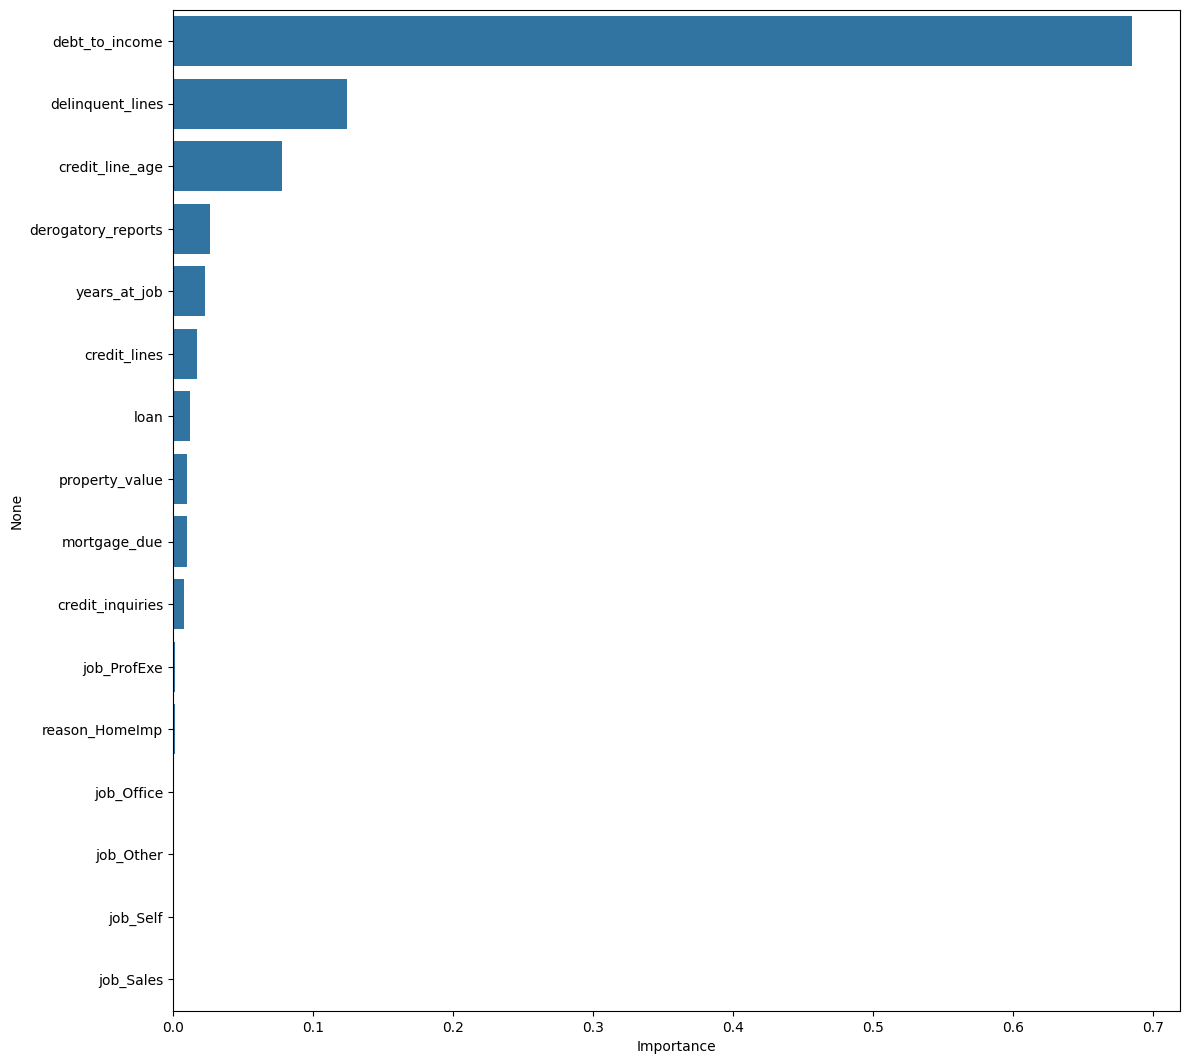

In [364]:
# get the feature importances from the Random Forest
rf_tuned_importances = rf_estimator.feature_importances_
# get the feature labels
rf_tuned_cols = X.columns
# create a dataframe of row=feature_name col=Importance 
rf_tuned_importance_df = pd.DataFrame(rf_tuned_importances, index=rf_tuned_cols, columns=['Importance']).sort_values(by='Importance', ascending=False)
# plot feature against importance value
plt.figure(figsize=(13,13))
sns.barplot(x=rf_tuned_importance_df['Importance'], y=rf_tuned_importance_df.index)

**Observations**<br>
There are 16 features listed in both the tuned and untuned Random Forests, however in the *tuned* RF we can see the following:
- There is a *significantly increased* importance placed on **debt_to_income**, with **delinquent_lines** and **credit_line_age** rounding out the top 3. 
    - The top 3 are similar to that of our untuned Random Forest. 
- Several features are now of almost negalible importance the most notable being **job**. Despite it being broken down into individual categories we can see that *all* the categories under the **job** feature have been reduced in importance to nearly $0$. 
    - The other feature being **reason_HomeImp**.


#### Observations

**Tuned Hyperparameter Values**
- *n_estimators*: 120
- *max_depth*: 5
- *min_samples_leaf*: 20
- *max_features*: 0.8
- *max_samples*: 0.9

**Performance Metrics**<br>

**Recall on class 1**
 ~|train|test
---|:---:|---: 
untuned|1.00|0.88
tuned|0.79|1.00

**Accuracy**
~|train|test
---|:---:|---: 
untuned|1.00|0.83
tuned|0.86|0.87

**Precision on class 1**
threshold|train|test
---|:---:|---: 
untuned|1.00|0.57
tuned|0.63|0.60


**Observations**<br>
We can see that the overfitting has resolved itself on the training set. However, we have a small problem. The recall on the *TEST* set is perfect which means that our hyperparameter tuning is causing the Tuned Random Forest to overfit on the *validation* set.
    - Hyperparameters such as **min_leaf_samples**, **max_depth** and **max_features** are features that were selected to aid in *optimizing* **Recall**. However, in this case, one or more of these may have resulted in the overfit on the *validation* set.

So, then lets do a quick look at the values that go into calculating **Recall**. Remeber, **Recall** measures the proportion of *True Positives* to all *actual* positives.</br> 

$\dfrac{TP}{TP + FN}$


True Positive, **TP**<br>
False Negative, **FN**

**Untuned**
~|train|test
---|:---:|---: 
TP|4747|21
FN|0|2

**Tuned**
~|train|test
---|:---:|---: 
TP|4193|20
FN|251|0

We can see that on the *Tuned RF* the *validation* **Recall** had `20` samples as True Positives and `0` as False Negatives. Where as on the *Untuned RF* we see that there were `2` False Negatives detected. 


# **Model Comparisons**

## Overview

To better assist the Consumer Credit Department at the bank in *predicting whether or not a client will default on a Home Equity Loan(HEQ)* given the factors found in the Equal Credit Opportunity Act(HMEQ) we built three classification models.
- Logistic Regression
- Decision Tree
- Random Forest

## Performance Evaluation

Our chosen *Performance Metric* is **Recall** and we will be comparing the *tuned* versions of the three models because these models are more optimized to the data.
- **class 1** = defaulted

**Recall on class 1**<br>
model|train|test
---|:---:|---: 
logistic regression|0.45|0.33
decision tree|0.87|0.83
random forest|0.79|1.00

**Logistic Regression** 
- Logistic Regression performed the poorest on **Recall**, even after tuning, and while there might be some room for improvement given we saw there were several medium - high correlated features, a further tuning process would be non-trivial and time consuming. 
- Tuned on threshold = $0.35$<br>

**Decision Tree** 
- The tuned Decision Tree performed quite well on both the *training* and *test* sets. Some improvements could be made by adjusting other hyperparameters but it's unclear whether those changes would show a marked improvement while also staying away from overfitting.
- Tuned on: 
    - *class_weight*: 'balanced' 
    - *criterion*: entropy
    - *max_depth*: 9
    - *min_samples_leaf*: 25

**Random Forest** 
- The tuned Random Forest technically performed the best on the *test* set, but is exhibting *overfitting* on the set which is likely due over-tuning. In contrast, it did not perform as well as the single Decision Tree on the *training* set. Improvements could be made by matching the hyperparameters of the tuned Decision Tree to that of the tuned Random Forest. In this, we will likely see the model not overfit on the *test* set. 
- Tuned on:
    - *n_estimators*: 120
    - *max_depth*: 5
    - *min_samples_leaf*: 20
    - *max_features*: 0.8
    - *max_samples*: 0.9

**The Other Metrics**<br>

**Precision on class 1**
model|train|test
---|:---:|---: 
logistic regression|0.68|0.50
decision tree|0.59|0.56
random forest|0.63|0.60

**Accuracy**
model|train|test
---|:---:|---: 
logistic regression|0.81|080
decision tree|0.85|0.83
random forest|0.86|0.87


# **Problem and Solution Summary**

**Problem**<br>
The bank's consumer credit department would like to establish a simplified decision making model to predict clients who will default on a home equity loan (HEQ) that is both reliable and rigourous. Therefore, the **goal is to simplify the decision making process** for the Consumer Credit Department. Thus, determining key features, and offering reliable decision pathways for the department is critical in this simplification.  

**Solution**<br>
The recommended model to adopt is the **Decision Tree** for the following reasons:
1. The *visibility* in the Decision Tree on the key features would be beneficial in understanding how the decisions are made because the graphical representation provides a 'flow chart' on the decision making process.
    - Since the Consumer Credit Department has explicity asked that the guidelines in the Equal Credit Opportunity Act be used, providing visibility into the decision making process allows the department to better respond to audits and inquiries, and thus reduce the risk of negative outcomes. 
        - On a similar thread, if a client comes to the department questioning their decision then they can provide necessary details.
    - Decisions on a client whose data puts them 'on the fence' can be more easily moved to a more human based decision while still following the guidelines.
2. *Key Feature Determination* is simplified because a Decision Tree's creates a hierarchy of feature relevance that is easily interpretable and naturally de-emphasizes irrelevant features. 
    - This will provide the Consumer Credit Department with a set of key features to focus on and thus reduce the number of factors in the decision process. 
3. The *dataset is unbalanced* as the majority of clients *don't* default on their loans, but it is very important to the bank's profit margins. Per the performance evaluations the Decision Tree performed best on our chosen performance metric **Recall** and compared to the other two models on **Precision** and **Accuracy**, it performed about the same. 
    - **Recall** is the key performance metric as incorrectly classifying a client as one who is *likely to not default* when they are *likely to default* will have *negative repercussions*. 
    - A Decision Tree, is better at predicting whether or not a client will default as they are more robust to the causes of imbalance found in this data set such as skewness and many outliers.  
4. The less robustness of a Decision Tree could be beneficial when adding or expanding features because each change will likely have an visible affect on the decision making process. This will allow for the *ease of personalization* to the department's needs while still providing general guidelines and key features to chose from. 
    - However, a small change could lead the model to make an incorrect decision. This is why monitoring the **Recall** score of the model is critical in ensuring confidence in its predictions.

# **Recommendations for Implementation**

## Missing Values

Several of the features in the dataset provided were missing features.
- Most notably, **debt_to_income** is missing $1267$ values and since this feature has been shown to be a key indicator on whether or not a client will be able to make monthly payments, not having this value for a client could drastically affect whether or not the model will classify them correctly.

Therefore, to improve the model's ability to make the correct decision on a client, the Consumer Credit Department should take the time to acquire the most comprehensive data they can for each client. They should focus on:
1. *debt_to_income* - the ratio of a clients monthly debt payments to their cross income.
2. *delinquent_lines* - the number of credit liens where the client has not made required minimum payments 30 to 60 days past the due date for that line.
3. *credit_line_age* - the age of a clients oldest credit line.

The reason they should focus on these three features is two-fold:
1. These have been identified as the key features in determining whether or not a client will default on the HEQ should they be given one.
2. When exploring the data, we discovered that there is correlation between these three features and many other features. This means that the information in these three features covers the information in other features. 

Therefore, instead of having the Consumer Credit Department try to fill every missing value for every client they *can focus on just the key ones. In this way, the model improves with less effort.*  


## Correlated Features

As mentioned when we discussed the numerous *Missing Values* found in the data set, there are several features that show a **High Correlation** with each other. 
- In the same way that focusing on the three features mentioned above will improve them model, removing the features with moderate to high correlation to them could also improve *improve the Decision Tree's ability to correctly classify a client who will default*. 
    - This will *simplify* the number of factors that lead to a decision and improve the Consumer Credit Department's ability to *understand* how a decision was made. 
- The added bonuses are that: 
    1. The more focused a Decision Tree is better its ability to make correct decisions. Thus, the lower the chance it will *incorrectly* decide a client should be given a loan when that client will default on it.
    2. The less features a Decision tree has to make decisions on the less time it will take to make this decision. Thus, the Consumer Credit Department can make their decision swiftly, and move onto the next client.

## Additional Feature Suggestion

### Equity

**Equity** is defined as the amount a client can borrow against their home and thus controls how much a client can request. 
- It is calculated by subtracting the mortgage due on a property from its value and dictates the value of the Home Equity Loan. In our dataset we have both of these values and they are shown to have *high correlation*. While their relative importance to the other key features is less, combining them into a singular representative feature could be beneficial.
    1. The most notable benefit is the *added understandability* this feature could add. 
        - When the Consumer Credit Department reviews the decision made by the model being able to see a client's equity in that decision could aide them in their ultimate decision. 
        - A client requesting a HEQ that is a large portion of their equity could be problematic. Especially when combined with an already high *debt to income ratio* or large number of *delinquent credit lines*. 
    2. As noted above, the less features our model has to make decisions on the less time it will take to make the decision.

### Ratio of Delinquent Credit Lines to Number of Credit Lines

The two features of **delinquent_lines** and **credit_lines** are moderately correlated. Combining them into a feature that may better represent the relationship between these two features could prove beneficial. 

$delinquency\,=\,\dfrac{delinquent\,lines}{total\,credit\,lines}$

This ratio could show the Consumer Credit Department how well a client has been able to manage their credit lines which could be key to determining whether or not they will default. 

## Unbalanced Data

The dataset given is unbalanced because the ratio of clients who didn't default to client who did is $80:20$. The level of unbalance often leads to bias in the Decision Tree towards the majority class; in this case the clients who didn't default. 
- This bias means that the model may have more difficulty detecting the clients who will default. In our case, this bias can directly affect the bank's profit margins because a client who will default being given a HEQ loan means that the bank *cannot collect interest* on the loan. 

It is recommended that the Consumer Credit Department *seek to add to the dataset more clients who defaulted* so that the model is better able to balance its decision making and thus correctly detect clients who will default. 

# **Executive Summary**

## Problem Statement

The Consumer Credit Department would like to automate and simplify the Home Equity Loan decision making process via utilizing Data Science and Machine Learning. 


## Key Takeaways 

### **Key Features** in order of importance:

1. *debt_to_income* - the ratio of a clients debt to their income is a key factor in determining whether or not they are able to make the new monthly payment attributed to the HEQ reliably. 
    - It's significant importance to the decision making process shows that a client with a *high debt_to_income ratio* will be more likely to default than one who has a lower ratio.
        - This is key to the bank's ability to collect interest on these loans. A client who can make the monthly payments is one that the bank can collect interest on for the lifetime of the loan. 
2. *delinquent_lines* - the number of credit lines a client has that are delinquent directly reflects on their ability to take on another credit line such a HEQ loan. 
    - If a client has a large portion of their credit lines labelled as delinquent then the likelihood that a new credit line will also become delinquent is higher. Thus by association the client is more likely to default to reduce the debt they have. 
        - While the loan can still *accrue* interest if it was delinquent, that interest along with the principle of the loan is not likely to be paid by the client and thus the bank cannot *collect* on the interest. 
3. *credit_line_age* - the age of the oldest credit line a client has is a reflection on their relative trustworthiness. In theory, the older the credit lines are for a client the more trustworthy because a client would not be given a credit line if they were determined to not be able to make reliable payments over a signifigant period of time on their lines. 
    - For the Consumer Credit Department, a client with a very old credit line could indicate that this client has reliably made payments in the past and could be trusted again and given the requested HEQ. 

*Notably*, the amount of the **loan** given, the **reason** for the loan, and the current **job** and number of **years_at_job** don't appear to have as much value in determining whether or not a client will default. 

### **The Model**

A Decision Tree classification model provides the best solution to the goal of *simplifying the decision making process* because it not only provides clear visibility into its decision making but also understandability. These two features are key in aiding the Consumer Credit Department in their ultimate goal of detecting clients who request Home Equity Loans but will default on them thus directly affecting the bank's profit margins. 

The additional support leant during the *performance evaluation comparison* showed that the Decision Tree performed best on the chosen metric of **Recall** where it was less likely to classify a client who will default as one who won't. Therefore, the Decision Tree is better at protecting the bank's ability to collect interest on Home Equity Loans via making the correct decision.

The added bonus is that a Decision Tree's sensitivity to change means that, if need be, it can be updated and that update is readily reflected in its decision making. 

With this model the **Consumer Credit department can make their final decisions with confidence** and should a client or outside source seek explaination be able to provide this explaination clearly and reliably. 

#### Specifications

It has been determined that building a tree with the following specifications:<br>
Hyperparameter|value
---|---:
class weights | balanced
impurity measure| entropy
max tree depth| 9
min samples perleaf | 25



## Next Steps


#### Business Recommendations

The Consumer Credit Department should strongly consider the following when making a final decision on a client:
1. A client's **debt to income ratio**.
2. The ratio of **delinquent accounts** to the **number of credit lines** a client has.
3. The **age** of their oldest credit line.


The Consumer Credit Department should moderately consider the following when making a final decision on a client:
1. The client's **profession**. 
2. The amount of the **loan** a client is requesting. vs. the amount of **equity** a client has.

The Consumer Credit Department should minimally consider the following when making a final decision on a client:
1. The **years** a client has been at their **current job**
2. The **reason** for requesting a Home Equity Loan


#### Model Improvement

The Consumer Credit Department and the Data Science team should prioritize the following to improve the model's ability to correctly class a client as likely to default:
1. Adding additional *clients who defaulted* into the data to provide a more balanced view of the causes of default.
2. Client records missing the key features of *debt_to_income* ratio, number of *delinquent_lines*, and *credit_line_age* should be investigated with the intention of assigning those values. 
3. Consider the potential benefits of combining the values of *mortgage_due* with *property_value* via calculating *equity* and replacing these two features with this new value. 
4. Consider how different combinations of moderate to highly correlated features affect the model's ability to make decisions and chosing the best combination to suit their needs.

### A Quick Note

There are other types of classification models that were not tested here that could provide the Consumer Credit Department with a better outcome. It is important that they discuss with the Data Science whether or not these other models may be of more benefit to them and if the additonal cost of testing is worth pursuing this avenue.

## Risks & Challenges

1. No model is perfect and errors can happen. Therefore, each decision made by the model must be understood before finalizing.
2. A Decision Tree is consider moderately robust.
    - Outliers and diversity in the data are adequately handled.
    - Small changes in the data could have large reprecaussions in the models ability to correctly classify 
3. Determining a client's likelihood to default could be time consuming given the number of decisions the current model is using to make its decision.
4. Alternatively, focusing on a only a few key features could lead to unwanted bias in the decision making process.

